# Projeto previsão de vendas do Big Mart

Conjunto de dados extraido da plataforma Kanggle

Link: https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets


# 1. Introdução

Os cientistas de dados do BigMart coletaram dados de vendas de 2013 para 1.559 produtos em 10 lojas em diferentes cidades. Além disso, foram definidos alguns atributos de cada produto e loja. O objetivo é construir um modelo preditivo e prever as vendas de cada produto em um determinado ponto de venda. Usando este modelo, o BigMart tentará entender as propriedades dos produtos e pontos de venda que desempenham um papel fundamental no aumento das vendas. Observe que os dados podem ter valores ausentes, pois algumas lojas podem não relatar todos os dados devido a falhas técnicas. Portanto, será necessário tratá-los adequadamente.

# 2. Objetivo

Construir um modelo de predição vendas.

# 3. Justificativa

Esse projeto possui um problema de negócio que envolve previsão de vendas. Esse é um tipo de problema muito importante para as empresas, visto que uma vez que elas possuem um modelo que consegue prever as vendas da empresa apresentando uma boa performance, elas podem antecipar os valores futuros que serão recebidos para o presente momento. Dessa maneira, se por exemplo, imaginemos que o gerente de uma determinada empresa quer fazê-la crescer, expandindo-a. Acontece que o crescimento de uma empresa passa pela contratação de pessoas, adquisição de novos equipamentos e ferramentas, dentre outros. Sendo assim, se a empresa tem uma previsão/expectativa do quanto de faturamento que ela irá ter nos próximos meses/anos, ela já consegue, por exemplo, tomar um empréstimo no banco para investir agora e fazer a empresa crescer no presente momento sem ter que precisar esperar por um dinheiro futuro. Dessa maneira, usando este modelo, o BigMart tentará entender as propriedades dos produtos e pontos de venda que desempenham um papel fundamental no aumento das vendas.

# 4. Metodologia

Este é um projeto de data sciense and analyts, que envolve a utilização de modelos de machine leaning com objetivo de prever as vendas de cada produto em um determinado ponto de venda do Big Mart. Para alcançar o objetivo proposto, o primeiro passo é importar as bibliotecas necessárias para construção do projeto. Em seguida, é feita a coleta dos dados. Logo após, uma análise dos dados inicial, com intuito de conhecer os dados e verificar possíveis inconsistências, tais como valores faltantes, valores inconsistentes, valores duplicados, presença de outliets, dentre outros. Depois, é feito a limpeza e o tratamento dos dados. Em seguida é realizado análise exploratória dos dados, com a finalidade de obter insigts para o time de negócios. Segue se a essa etapa a preparação dos dados para aprendizagem dos modelos de Marchine Learning. Com os dados já preparados é feito a aplicação dos Modelos de Machine Learning. Após isso, esses modelos passa por uma avaliação, em que é escolhidos os modelos que serão colocados em produção. Por fim, a última etapa é focada em traduzir o desempenho dos modelos escolhidos para métricas de negócios.

# 5. Importação das bibliotecas utilizadas ao longo de todo o projeto

In [1]:
import pandas as pd                                   # (Biblioteca que contém os comandos para ler as planilhas)
import numpy as np                                    # (Biblioteca que contém os comandos para realização de cálculos)
import matplotlib.pyplot as plt                       # (Para geração de gráficos)  
import statsmodels.formula.api as sm                  # (Para criar o modelo de regressão linear múltipla)
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts
import inflection                                                     # usado ao renomear colunas na subseção
import plotly.express as px
from pyod.models.knn import KNN                                   # Para gerar detecção de outliers com o algoritmo KNN
import sklearn
from sklearn.datasets import load_boston
from IPython.display       import Image                                      # Para importar imagens
from scipy                 import stats as ss                                # Para executar o teste de shapiro
import pylab
from scipy.stats import norm                                                  # Para gerar a distribuição normal
from sklearn.preprocessing import LabelEncoder                                # Transforma os dados categóricos em dados númericos.
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler                               # escalonamento
from sklearn.model_selection import train_test_split                           # Para dividir os dados em treino e teste
import pickle                                                                  # Utilizado para salvar variáveis em disco
from sklearn.linear_model import LinearRegression                              # Para criar o modelo de regressão
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics       import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble      import RandomForestRegressor
from sklearn.linear_model  import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold                      # Para implementação da validação cruzada

# 6. ETAPA I: *****Coleta de dados*****

### 6.1 Carregando e Visualizando a base de dados

In [2]:
base_de_dados= pd.read_csv('train.csv', low_memory = False)
base_de_dados

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### 6.2 Fazendo uma cópia da base de dados

In [3]:
base_de_dados1 = base_de_dados.copy()
base_de_dados1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### 6.3 Renomeando colunas

In [4]:
# Renomeando as colunas

lista_original = ['Item_Identifier', 'Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Item_Outlet_Sales']
lista_renomeada = ["ID_produto", "Peso_produto", "Teor_gordura_produto", "%_área_exibição_produtos", "Categoria_produto", "Preço_máximo_varejo", "ID_da_Loja", "Ano_que_loja_estabelecida", "Tamanho_Loja", "Tipo_cidade_localizada","Tipo_ponto_venda","Vendas"]
base_de_dados1 = base_de_dados  = pd.read_csv('train.csv', low_memory = False)
base_de_dados1.columns = lista_renomeada
base_de_dados1

,ID_produto,Peso_produto,Teor_gordura_produto,%_área_exibição_produtos,Categoria_produto,Preço_máximo_varejo,ID_da_Loja,Ano_que_loja_estabelecida,Tamanho_Loja,Tipo_cidade_localizada,Tipo_ponto_venda,Vendas
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# 7. ETAPA II:  Verificando inconsistências nos dados

Esta seção tem por objetivo entender melhor os dados, identificando a existência de problemas/inconsistências.

### 7.1 Dimensão/Tamanho dos dados

In [118]:
# Verificando quantidade de linhas e colunas

base_de_dados1.shape

(8523, 12)

* O conjunto de dados possui 8523 linhas e 12 colunas.

### 7.2 Tipo dos dados

In [5]:
# Verificando o tipo dos dados

Tipo_de_dados = pd.DataFrame(base_de_dados1.dtypes)
Tipo_de_dados

,0
ID_produto,object
Peso_produto,float64
Teor_gordura_produto,object
%_área_exibição_produtos,float64
Categoria_produto,object
Preço_máximo_varejo,float64
ID_da_Loja,object
Ano_que_loja_estabelecida,int64
Tamanho_Loja,object
Tipo_cidade_localizada,object


In [127]:
# Informações gerais sobre os dados

informacoes_gerais_dos_dados = pd.DataFrame(base_de_dados1.info())
informacoes_gerais_dos_dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_produto                 8523 non-null   object 
 1   Peso_produto               7060 non-null   float64
 2   Teor_gordura_produto       8523 non-null   object 
 3   %_área_exibição_produtos   8523 non-null   float64
 4   Categoria_produto          8523 non-null   object 
 5   Preço_máximo_varejo        8523 non-null   float64
 6   ID_da_Loja                 8523 non-null   object 
 7   Ano_que_loja_estabelecida  8523 non-null   int64  
 8   Tamanho_Loja               6113 non-null   object 
 9   Tipo_cidade_localizada     8523 non-null   object 
 10  Tipo_ponto_venda           8523 non-null   object 
 11  Vendas                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


""


### 7.3 Verificando existência de valores nulos

In [6]:
# Verificiando a existência de valores nulos

valores_nulos=pd.DataFrame(base_de_dados1.isnull().sum(),columns=['Números De Nulos'])
valores_nulos['Porcentagem (%)']=valores_nulos['Números De Nulos']/len(base_de_dados1)*100
valores_nulos

,Números De Nulos,Porcentagem (%)
ID_produto,0,0.000000
Peso_produto,1463,17.165317
Teor_gordura_produto,0,0.000000
%_área_exibição_produtos,0,0.000000
Categoria_produto,0,0.000000
Preço_máximo_varejo,0,0.000000
ID_da_Loja,0,0.000000
Ano_que_loja_estabelecida,0,0.000000
Tamanho_Loja,2410,28.276428
Tipo_cidade_localizada,0,0.000000


* Como podemos observar, a coluna "Peso do produto" possui 1463 valore nulos.
* Já a coluna "Tamanho da loja em termos de área coberta" possui 2410.
* Perceba que os valores nulos representam aproximadamente 17,17% dos dados da coluna "Peso do produto".
* E aproximadamente 28,28% dos dados da coluna "Tamanho da loja em termos de área coberta

### 7.4 Verificando existência de valores inconsistentes

* Na coluna Teor de gordura do produto consta as seguintes categorias: Low Fat (Baixo teor de gordura), Regular, LF (baixo teor de gordura), reg (Regular) e low fat (Baixo teor de gordura). Só que existem categorias repetidas, mas que foi escritas de forma diferentes. Sendo assim, Low Fat, LF e low fat se refere a uma única categoria que é baixo teor de gordura, enquanto que Regular e Reg se refere somente a Regular.


* Na coluna % da área total de exibição de todos os produtos em uma loja alocada para o determinado produto foi identificado algumas linhas com 0. Acontece que não existe produtos com área de exibição 0.

### 7.5 Verificando a existência de dados duplicados

In [129]:
# Verificando a existência de dados duplicados

base_de_dados1[base_de_dados1.duplicated()]

,ID_produto,Peso_produto,Teor_gordura_produto,%_área_exibição_produtos,Categoria_produto,Preço_máximo_varejo,ID_da_Loja,Ano_que_loja_estabelecida,Tamanho_Loja,Tipo_cidade_localizada,Tipo_ponto_venda,Vendas


In [14]:
base_de_dados1.duplicated().any()

False

* Não há valores duplicados.

### 7.6 Detecção de Outliers

#### 7.6.1 Detectando outiliers com o Boxplot

Text(0.5, 1.0, 'Vendas do produto em cada loja')

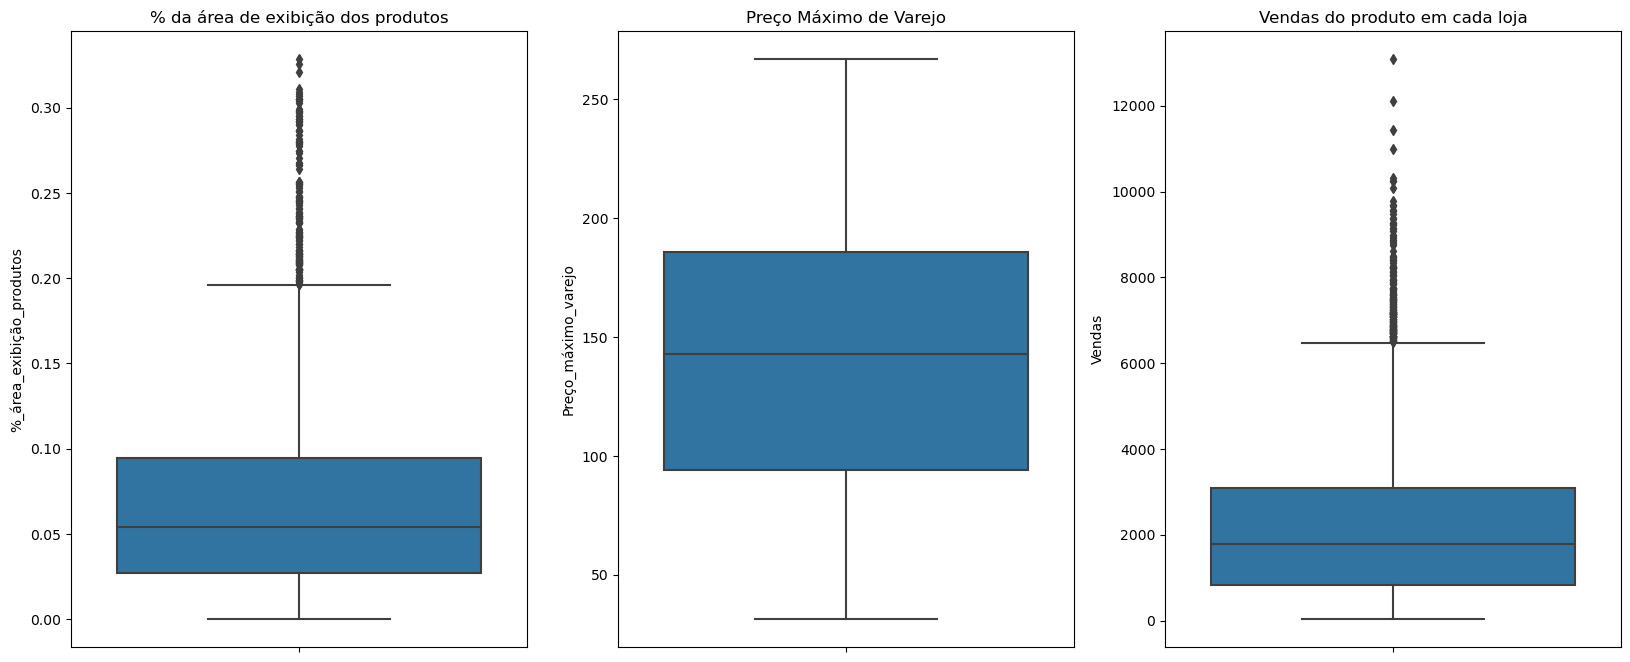

In [15]:
# Detectando outliers com o boxplot

plt.figure(figsize=(20, 8))

plt.subplot( 1, 3, 1 )
sns.boxplot(data=base_de_dados1,y = '%_área_exibição_produtos');
plt.title( '% da área de exibição dos produtos' )

plt.subplot( 1, 3, 2 )
sns.boxplot(data=base_de_dados1,y = 'Preço_máximo_varejo');
plt.title( 'Preço Máximo de Varejo' )

plt.subplot( 1, 3, 3 )
sns.boxplot(data=base_de_dados1,y = 'Vendas');
plt.title( 'Vendas do produto em cada loja' )

#### 7.6.2 Detectando outiliers com o algoritmo KNN

In [16]:
# Selecionando as variáveis númericas

variaveis_numericas = base_de_dados1.select_dtypes( include = ['int32', 'int64', 'float64'] )
variaveis_numericas

,Peso_produto,%_área_exibição_produtos,Preço_máximo_varejo,Ano_que_loja_estabelecida,Vendas
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [17]:
# Criando uma variável detector que vai receber KNN e passando os dados.

detector = KNN()
detector.fit(variaveis_numericas.iloc[:,1:6])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

* Como estamos trabalhando com o KNN basicamente é feito um cálculo de distância entre os registros. Aqueles registros que tiver uma distância muito grande da maioria é considerado um outliers.

In [18]:
# Obtendo as previsões
# Ele vai gerar a previsão para cada um dos registros indicando se é ou não é um outliers

previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 0])

* Perceba que ele retorna um array com 0 e 1. O Zero indica que o registro não é um outliers e 1 indica que o registro é um outliers.

In [19]:
# Contagem de quantos outliers foram detectados (ele vai contar quantos 0 e quantos 1)

np.unique(previsoes, return_counts=True)

(array([0, 1]), array([7670,  853], dtype=int64))

* Temos 7670 registros que não são considerados outliers e 853 registros que são considerados outliers.


* A vantagem de utilizar essa biblioteca é que ele vai fazer o cálculo de distância considerando todos os atributos, diferentemente do gráfico boxplot ou do gráfico de dispersão que o número de atributos é limitado e precisamos fazer a visualização manualmente para saber se de fato o registro é um outliers.

In [20]:
# Obtendo a confiança dessas previsões

confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([23.65860291, 11.55216046, 13.33559256, ..., 10.67438691,
       12.12401917, 14.40903967])

* Note que o primeiro registro que foi classificado como outliers tem um valor de distância muito superior aos outros. Isso indica que esse último registro possui uma distância muito grande se comparado com os demais registros. Por isso ele é considerado um outliers.

In [21]:
# Buscando os índices de registros que são considerados outliers

outliers = []
for i in range(len(previsoes)):
  #print(i)
  if previsoes[i] == 1:
    outliers.append(i)

In [22]:
print(outliers)

[7, 20, 21, 43, 48, 55, 66, 74, 113, 116, 119, 128, 130, 132, 136, 145, 146, 162, 168, 180, 198, 203, 212, 240, 243, 249, 259, 271, 275, 276, 288, 300, 302, 304, 320, 329, 332, 333, 337, 351, 357, 366, 368, 373, 376, 402, 403, 416, 418, 423, 424, 449, 456, 472, 491, 497, 516, 525, 528, 537, 542, 566, 610, 614, 625, 627, 640, 641, 645, 646, 657, 661, 663, 676, 685, 692, 694, 729, 753, 765, 773, 782, 783, 796, 804, 809, 829, 834, 837, 844, 885, 903, 915, 935, 943, 947, 962, 964, 977, 987, 991, 997, 998, 1009, 1012, 1016, 1040, 1041, 1043, 1049, 1060, 1067, 1069, 1084, 1092, 1098, 1100, 1101, 1113, 1127, 1138, 1145, 1171, 1173, 1185, 1194, 1254, 1257, 1260, 1281, 1290, 1293, 1326, 1334, 1341, 1344, 1348, 1363, 1370, 1373, 1374, 1379, 1386, 1393, 1398, 1409, 1436, 1441, 1450, 1451, 1455, 1467, 1485, 1506, 1507, 1510, 1513, 1523, 1524, 1531, 1539, 1563, 1564, 1565, 1577, 1581, 1583, 1601, 1611, 1624, 1627, 1636, 1650, 1658, 1665, 1667, 1673, 1682, 1685, 1697, 1700, 1702, 1705, 1709, 1710, 1

In [23]:
# Lista completa dos outliers para ser enviada para o setor

lista_outliers = variaveis_numericas.iloc[outliers,:]
lista_outliers

,Peso_produto,%_área_exibição_produtos,Preço_máximo_varejo,Ano_que_loja_estabelecida,Vendas
7,NaN,0.127470,107.7622,1985,4022.7636
20,18.850,0.138190,250.8724,1987,3775.0860
21,NaN,0.035400,144.5444,1985,4064.0432
43,21.350,0.069103,259.9278,2009,6768.5228
48,15.850,0.121633,60.6220,1997,2576.6460
...,...,...,...,...,...
8485,NaN,0.043792,189.0530,1985,6261.8490
8504,NaN,0.124111,111.7544,1985,4138.6128
8506,17.250,0.084676,263.1910,2009,3944.8650
8510,13.800,0.056862,231.5984,2004,7182.6504


### 7.6 Conclusões

Foi dentificado os seguintes problemas:

* Na coluna Peso do produto foi identificado 1463 valores nulos e na coluna Tamanho da loja em termos de área coberta 2410.


* Na coluna Teor de gordura do produto consta as seguintes categorias:  Low Fat (Baixo teor de gordura), Regular, LF (baixo teor de gordura), reg (Regular) e low fat (Baixo teor de gordura). Só que existem categorias repetidas, mas que foi escritas de forma diferentes. Sendo assim, Low Fat, LF e low fat se refere a uma única categoria que é baixo teor de gordura, enquanto que Regular e Reg se refere somente a Regular.


* Na coluna % da área total de exibição de todos os produtos em uma loja alocada para o determinado produto foi identificado algumas linhas com 0. Acontece que não existe produtos com área de exibição 0.


* Não há valores duplicados.


* De acordo com o algoritmo KNN há 853 considerados outliers.

# 8. ETAPA III: Limpeza e Tratamento dos Dados

### 8.1 Tratando NANs (Excluindo NANs)

##### 8.1.1 Filtrando NANs

In [7]:
# Filtrando os valores faltantes das colunas "Peso do produto" e "Tamanho da loja em termos de área coberta"

base_de_dados1.loc[pd.isnull(base_de_dados1['Tamanho_Loja'])]

,ID_produto,Peso_produto,Teor_gordura_produto,%_área_exibição_produtos,Categoria_produto,Preço_máximo_varejo,ID_da_Loja,Ano_que_loja_estabelecida,Tamanho_Loja,Tipo_cidade_localizada,Tipo_ponto_venda,Vendas
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


##### 8.1.2 Excluindo as linhas com os valores faltantes

In [8]:
# Excluindo as linhas com os valores faltantes

base_de_dados2 = base_de_dados1.dropna() # Utilizamos o comando dropna com a variável dataframe atribuindo isso a uma nova variável.
base_de_dados2                           # Chamamos essa nova variável de dataframe1. Ela agora será a nossa nova base de dados.
                                         # Só que agora sem os valores faltantes.



,ID_produto,Peso_produto,Teor_gordura_produto,%_área_exibição_produtos,Categoria_produto,Preço_máximo_varejo,ID_da_Loja,Ano_que_loja_estabelecida,Tamanho_Loja,Tipo_cidade_localizada,Tipo_ponto_venda,Vendas
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### 8.2 Tratando os valores inconsistentes

##### 8.2.1 Substituindo os zeros da coluna % da área de exibição dos produtos pela mediana

In [9]:
#  Excluindo os zeros da coluna % da área de exibição dos produtos

# Imprimindo o número total de zeros
print('Total de zeros antes de substituir: ', sum(base_de_dados2['%_área_exibição_produtos'] == 0))

# Substituindo os números zeros pela mediana
base_de_dados2.loc[:,'%_área_exibição_produtos'].replace(to_replace=0,
                                            value=base_de_dados2['%_área_exibição_produtos'].mean(),
                                            inplace=True)

# Imprimindo o número total de zeros após a substituição
print('Total de zeros depois da substituição: ', sum(base_de_dados2['%_área_exibição_produtos'] == 0))

base_de_dados2

Total de zeros antes de substituir:  292
Total de zeros depois da substituição:  0


C:\Users\HOME\AppData\Local\Temp\ipykernel_7884\102446317.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_de_dados2.loc[:,'%_área_exibição_produtos'].replace(to_replace=0,


,ID_produto,Peso_produto,Teor_gordura_produto,%_área_exibição_produtos,Categoria_produto,Preço_máximo_varejo,ID_da_Loja,Ano_que_loja_estabelecida,Tamanho_Loja,Tipo_cidade_localizada,Tipo_ponto_venda,Vendas
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.060700,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.060700,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


##### 8.2.2 Substituindo as categorias [low fat] e [LF] por "Low Fat" e [reg] por "Regular"

In [10]:
# Imprimindo os as categorias

print(base_de_dados2['Teor_gordura_produto'].unique())

# Substituindo os valores repetidos
base_de_dados2['Teor_gordura_produto'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)
base_de_dados2['Teor_gordura_produto'].value_counts()
base_de_dados2

['Low Fat' 'Regular' 'low fat' 'reg' 'LF']


C:\Users\HOME\AppData\Local\Temp\ipykernel_7884\2516367196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_de_dados2['Teor_gordura_produto'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)


,ID_produto,Peso_produto,Teor_gordura_produto,%_área_exibição_produtos,Categoria_produto,Preço_máximo_varejo,ID_da_Loja,Ano_que_loja_estabelecida,Tamanho_Loja,Tipo_cidade_localizada,Tipo_ponto_venda,Vendas
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.060700,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.060700,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### 8.3 Tratando os Outliers

* Foi criada uma lista om os IDs dos registros que foram considerados outliers para ser enviada para o setor responsável para verificar o motivo desses outliers.

# 9. ETAPA IV: Análise Exploratória dos Dados Parte 2: Obtendo insigts para o time de negócios

### 9.1 Hipótese de Negócios

#### 9.1.2 Mapa Mental de Hipóteses

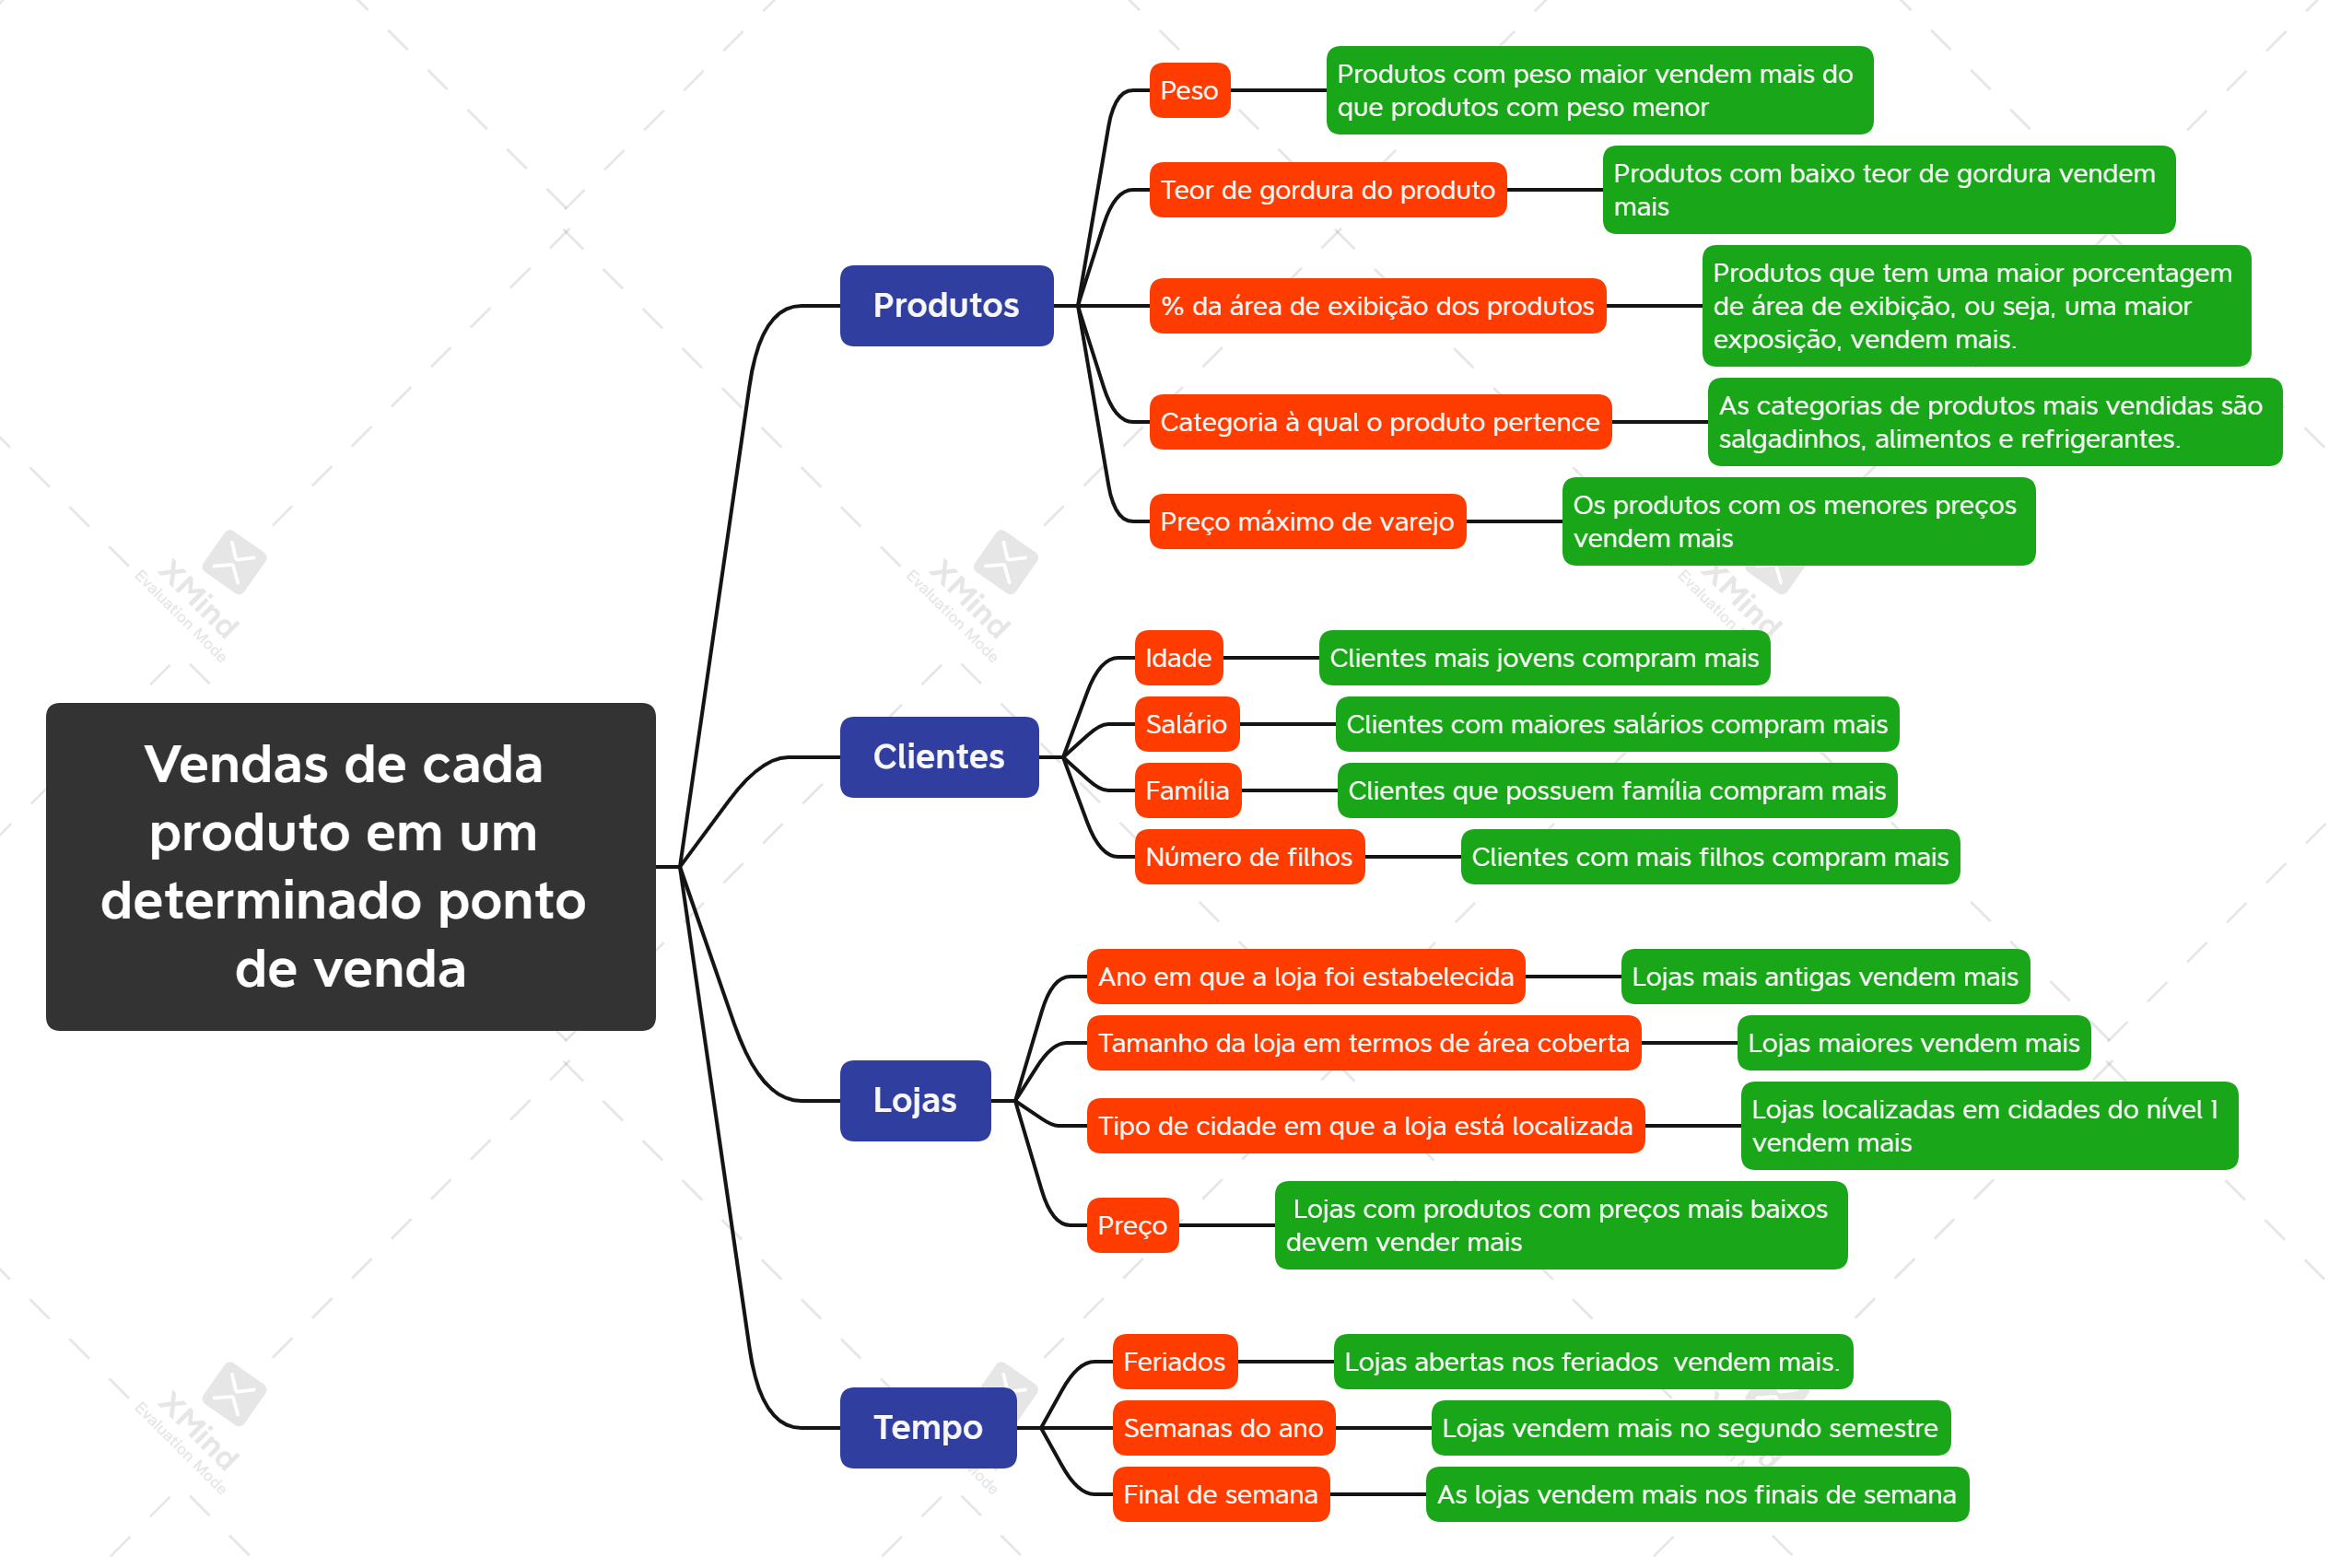

In [59]:
Image( 'Mapa Mental de Hipóteses.png' )

### 9.1.2 Lista de Hipóteses

##### >>>>>> Hipóteses do Produto

*****1*****. Produtos com peso maior vendem mais do que produtos com peso menor.

*****2*****. Produtos com baixo teor de gordura vendem mais.

*****3.***** Produtos que tem uma maior porcentagem de área de exibição, ou seja, uma maior exposição, vendem mais.

*****4.***** As categorias de produtos mais vendidas são salgadinhos, alimentos e refrigerantes.

*****5.***** Os produtos com os menores preços vendem mais.


##### >>>>>> Hipóteses de clientes

*****1.***** Clientes mais jovens compram mais

*****2.***** Clientes com maiores salários compram mais

*****3.***** Clientes que possuem família compram mais

*****4.***** Clientes com mais filhos compram mais

###### >>>>>> Hipóteses das Lojas

*****1.***** Lojas mais antigas vendem mais

*****2.***** Lojas maiores vendem mais

*****3.***** Lojas localizadas em cidades do nível 1 vendem mais

*****4*****  Lojas com produtos com preços mais baixos devem vender mais


##### >>>>>> Hipóteses relacionadas ao tempo

*****1.***** Lojas abertas nos feriados  vendem mais.

*****2.***** Lojas vendem mais no segundo semestre

*****3.***** As lojas vendem mais nos finais de semana

#### 9.1.3 Lista com as Hipóteses selecionadas

*****1*****. Produtos com peso maior vendem mais do que produtos com peso menor.

*****2*****. Produtos com baixo teor de gordura vendem mais.

*****3.***** Produtos que tem uma maior porcentagem de área de exibição, ou seja, uma maior exposição, vendem mais.

*****4.***** As categorias de produtos mais vendidas são salgadinhos, alimentos e refrigerantes.

*****5.***** Os produtos com os menores preços vendem mais.

*****6.***** Lojas mais antigas vendem mais

*****7.***** Lojas maiores vendem mais

*****8.***** Lojas localizadas em cidades do nível 1 vendem mais



### 9.2 Análise Univariada

##### 9.2.1 Distribuição da variável resposta

C:\Users\HOME\AppData\Local\Temp\ipykernel_12084\2581063850.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( base_de_dados2['Vendas'],color = 'Green');


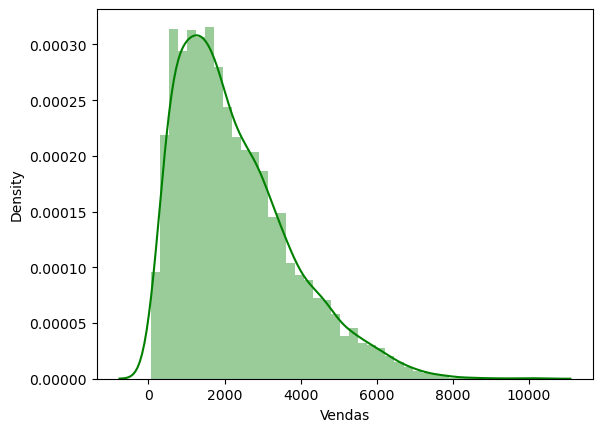

In [28]:
# Plotando um gráfico de distribuição normal

sns.distplot( base_de_dados2['Vendas'],color = 'Green');

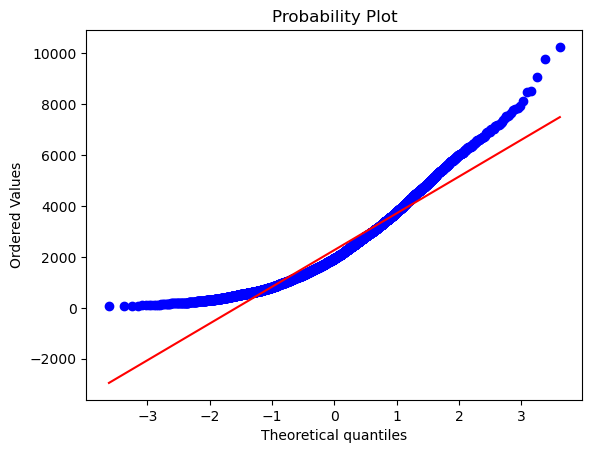

In [29]:
# Executando o teste de Shapiro-Wilk para ver se a distribuição está normal

ss.probplot( base_de_dados2['Vendas'], dist = 'norm', plot = pylab );

In [30]:
stat, p = ss.shapiro( base_de_dados2['Vendas'] )
print('Teste de Shapiro-Wilk para normalidade: \n')
print( 'stat=%.3f, p=%.3f\n' % ( stat, p ) )
if p > 0.05:
    print( 'Provavelmente é Gaussiano' )
else:
    print( 'Provavelmente não é Gaussiano' )

Teste de Shapiro-Wilk para normalidade: 

stat=0.929, p=0.000

Provavelmente não é Gaussiano


* A distribuição da variável resposta não é normal.

##### 9.2.2 Separando as variáveis categóricas e númericas

In [11]:
# Fazendo a divisão

atributos_numericos = base_de_dados2.select_dtypes( include = ['int32', 'int64', 'float64'] )
atributos_categoricos = base_de_dados2.select_dtypes( exclude = ['int32', 'int64', 'float64', 'datetime64[ns]'] )

In [12]:
# Visualizando somente as variáveis númericas

variaveis_numericas = pd.DataFrame(base_de_dados2.select_dtypes(include='number').columns.to_list())
variaveis_numericas

,0
0,Peso_produto
1,%_área_exibição_produtos
2,Preço_máximo_varejo
3,Ano_que_loja_estabelecida
4,Vendas


In [13]:
# Visualizando somente as variáveis categoricas

variaveis_categoricas = pd.DataFrame(base_de_dados2.select_dtypes(exclude='number').columns.to_list())
variaveis_categoricas

,0
0,ID_produto
1,Teor_gordura_produto
2,Categoria_produto
3,ID_da_Loja
4,Tamanho_Loja
5,Tipo_cidade_localizada
6,Tipo_ponto_venda


##### 9.2.3 Analisando os atributos númericos

###### >>> Estatísticas Descritivas

In [14]:
# Medidas de tendencia central (média e mediana)
ct1 = pd.DataFrame( atributos_numericos.apply( np.mean ) ).T
ct2 = pd.DataFrame( atributos_numericos.apply( np.median ) ).T


# Médidas de dispersão (desvio padrão, mínimo, máximo, faixa, assimetria, curtose
d1 = pd.DataFrame( atributos_numericos.apply( np.std ) ).T 
d2 = pd.DataFrame( atributos_numericos.apply( min ) ).T 
d3 = pd.DataFrame( atributos_numericos.apply( max ) ).T 
d4 = pd.DataFrame(atributos_numericos.quantile( .25 )).T
d5 = pd.DataFrame(atributos_numericos.quantile( .75 )).T
d6 = pd.DataFrame( atributos_numericos.apply( lambda x: x.max() - x.min() ) ).T 
d7 = pd.DataFrame( atributos_numericos.apply( lambda x: x.skew() ) ).T 
d8 = pd.DataFrame( atributos_numericos.apply( lambda x: x.kurtosis() ) ).T


# Concatenando e imprimindo as medidas
m = pd.concat( [d2, d3, d6, d4,  ct2, d5, ct1, d1, d7, d8] ).T.reset_index()
m.columns = ['Atributos', 'mínimo', 'Máximo', 'Faixa', '25%','Mediana','75%', 'Média', 'Desvio Padrão', 'Assimétria', 'Curtose'] # Renomeando as colunas
m

,Atributos,mínimo,Máximo,Faixa,25%,Mediana,75%,Média,Desvio Padrão,Assimétria,Curtose
0,Peso_produto,4.555000,21.350000,16.795000,8.770000,12.650000,17.000000,12.898675,4.670471,0.073999,-1.239030
1,%_área_exibição_produtos,0.003589,0.188323,0.184734,0.031413,0.058262,0.088736,0.064512,0.041754,0.858706,0.053511
2,Preço_máximo_varejo,31.490000,266.888400,235.398400,94.409400,142.979900,186.614150,141.716328,62.413821,0.130968,-0.894543
3,Ano_que_loja_estabelecida,1987.000000,2009.000000,22.000000,1997.000000,1999.000000,2004.000000,1999.190538,7.388005,-0.383454,-0.856167
4,Vendas,69.243200,10256.649000,10187.405800,1125.202000,1939.808300,3111.616300,2272.037489,1497.803660,1.005604,0.867399


##### >>> Distribuição das variáveis numéricas

C:\Users\HOME\AppData\Local\Temp\ipykernel_12084\3376513072.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( base_de_dados2['Peso_produto'], color = 'Green' );
C:\Users\HOME\AppData\Local\Temp\ipykernel_12084\3376513072.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( base_de_dados2['%_

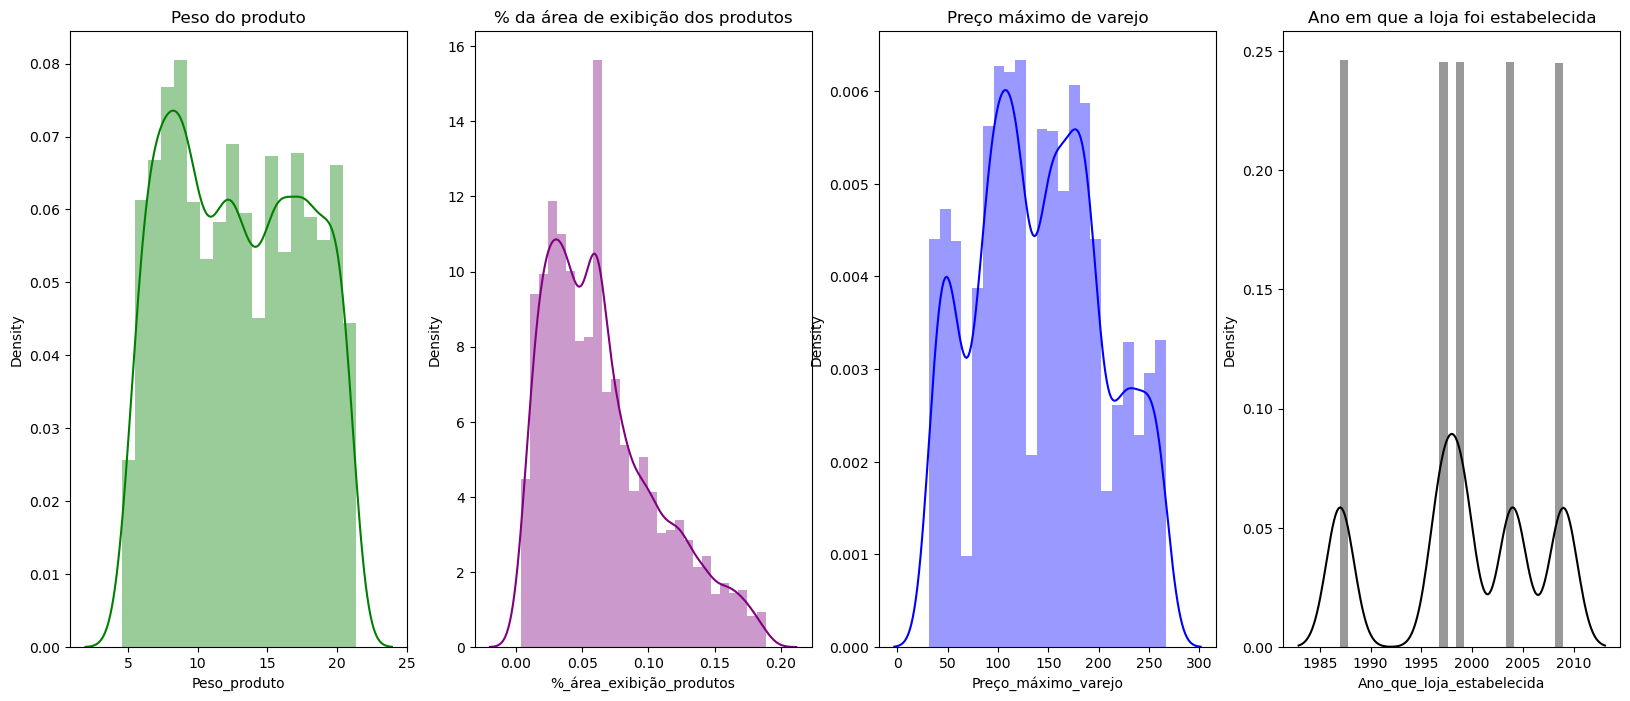

In [35]:
# Plotando distribuição das variáveis numéricas

plt.figure(figsize=(20, 8))

plt.subplot( 1,4,1);
sns.distplot( base_de_dados2['Peso_produto'], color = 'Green' );
plt.title( 'Peso do produto' )

plt.subplot( 1,4,2 );
sns.distplot( base_de_dados2['%_área_exibição_produtos'], color = 'Purple' );
plt.title( '% da área de exibição dos produtos' );

plt.subplot( 1,4,3 );
sns.distplot( base_de_dados2['Preço_máximo_varejo'], color = 'Blue' );
plt.title( 'Preço máximo de varejo' );

plt.subplot( 1,4,4 );
sns.distplot( base_de_dados2['Ano_que_loja_estabelecida'], color = 'Black' );
plt.title( 'Ano em que a loja foi estabelecida' );

array([[<AxesSubplot:title={'center':'Peso_produto'}>,
        <AxesSubplot:title={'center':'%_área_exibição_produtos'}>],
       [<AxesSubplot:title={'center':'Preço_máximo_varejo'}>,
        <AxesSubplot:title={'center':'Ano_que_loja_estabelecida'}>],
       [<AxesSubplot:title={'center':'Vendas'}>, <AxesSubplot:>]],
      dtype=object)

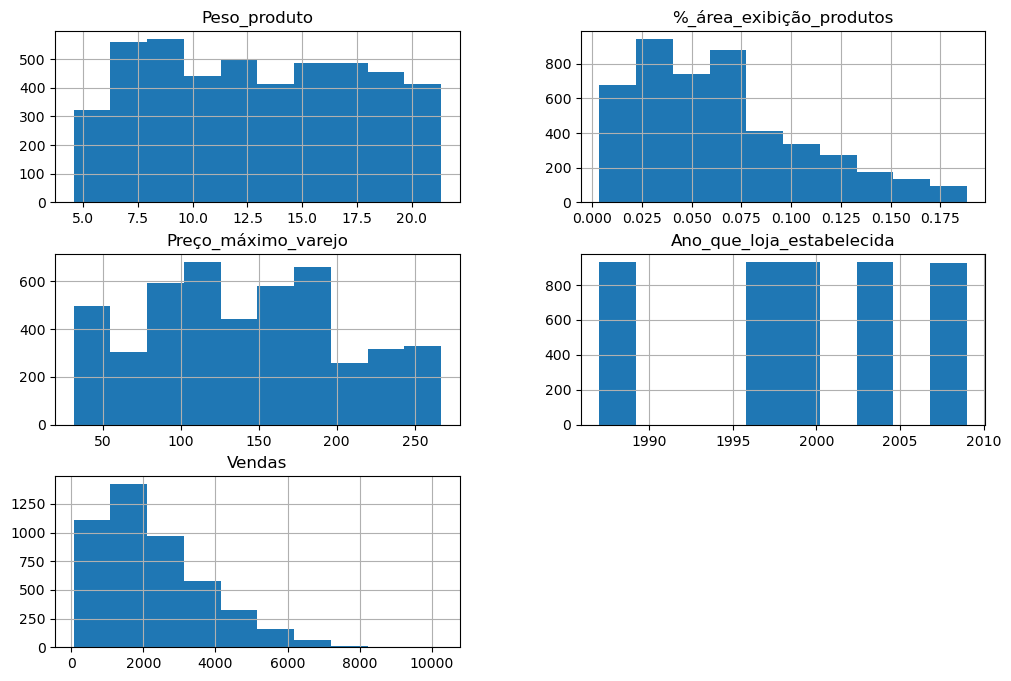

In [36]:
# Distribuição dos valores numéricos

base_de_dados2.hist(figsize=(12,8))

## 9.3 Análise Bivariada - Validação de Hipóteses 

### H1: Produtos com peso maior vendem mais do que produtos com peso menor.

In [37]:
# Quantidade de vendas por peso dos produtos

quant_vendas_por_peso = pd.DataFrame(base_de_dados2.groupby("Peso_produto")["Vendas"].sum().sort_values(ascending=False)).reset_index()
quant_vendas_por_peso

,Peso_produto,Vendas
0,12.150,154756.5546
1,15.100,130844.3476
2,20.250,123094.4356
3,13.650,118762.0750
4,16.000,117764.7066
...,...,...
404,7.105,1244.3802
405,6.715,1132.5258
406,7.840,998.7000
407,7.360,801.6232


*****FALSO*****: Não necessariamente. Os produtos com peso 12.150 foram os venderam mais, isto é, 154756.5546, e esse não é o maior peso. 

### H2: Produtos com baixo teor de gordura vendem mais.

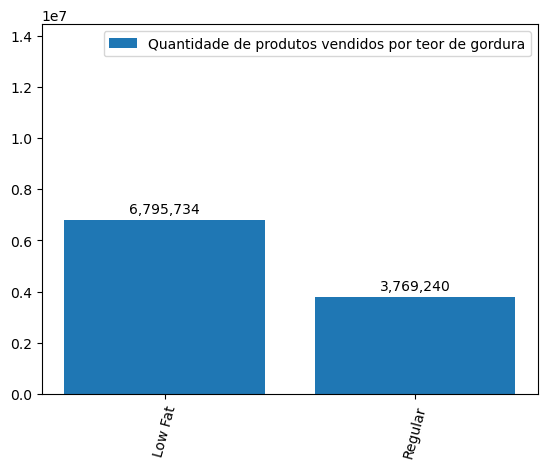

In [38]:
#>>>>>>>>>>>>>>>>>>>> Gerando o gráfico

# Colocando os númenros na ordem crescente para gerar o gráfico

# contagem = pd.DataFrame(base_de_dados2.groupby("Teor de gordura do produto")["Vendas"].count().sort_values(ascending=False)).reset_index()
contagem = base_de_dados2.groupby("Teor_gordura_produto")["Vendas"].sum().sort_values(ascending=False)

# make data
x = contagem.index
y = contagem.values

#### Melhorando a formatação do annotate
# plot
fig, ax = plt.subplots()

ax.bar(x, y, label="Quantidade de produtos vendidos por teor de gordura")
ax.tick_params('x',labelrotation=75)
ax.legend()

# Colocando os valores nos gráficos
## Precisamos fazer um loop para ir colocando os valores em cada uma das barras
for i in np.arange(0,2):
    plt.annotate('{:,.0f}'.format(y[i]), # formatando o número
                 (i,y[i]), # colocando a posição do elemento 
                 # outros parâmetros
                 ha="center", # alinhamento horizontal
                 xytext=(0,5), # deslocamento x,y do texto
                 textcoords="offset points" # referencial que vamos fazer o deslocamento
                )

ax.set(ylim=(0, 14434450))

plt.show()

*****VERDADEIRO*****: Foram vendidos 6,795,734 produtos com baixo teor de gordura e 3,769,240 com teor de gordura regular.

### H3: Produtos que tem uma maior porcentagem de área de exibição, ou seja, uma maior exposição, vendem mais.

In [39]:
# Agrupando quantidade de vendas por % da área de exibição dos produtos dos produtos

quant_vendas_por_area = pd.DataFrame(base_de_dados2.groupby("%_área_exibição_produtos")["Vendas"].sum().sort_values(ascending=False)).reset_index()
quant_vendas_por_area

,%_área_exibição_produtos,Vendas
0,0.060700,648958.5890
1,0.059847,11593.5754
2,0.019495,10256.6490
3,0.145266,9607.4940
4,0.035931,9069.5276
...,...,...
4275,0.108030,101.8674
4276,0.012770,78.5644
4277,0.046278,75.9012
4278,0.143164,73.2380


*****FALSO*****: Perceba que foram vendidos 648958.5890 (maior quantidade de vendas), os quais tinham uma área de exibição de 0.060700%. Contudo, essa não é a maior porcentagem de área de exibição. Tiveram produtos com porcentagem de área de exibição maior, porém as vendas não foram maior.

### H4: As categorias de produtos mais vendidas são salgadinhos, alimentos e refrigerantes.

In [40]:
# Agrupando quantidade de vendas por categoria dos produtos

quant_vendas_por_categoria = pd.DataFrame(base_de_dados2.groupby("Categoria_produto")["Vendas"].sum().sort_values(ascending=False)).reset_index()
quant_vendas_por_categoria

,Categoria_produto,Vendas
0,Snack Foods,1.568592e+06
1,Fruits and Vegetables,1.549511e+06
2,Household,1.188504e+06
3,Frozen Foods,1.059900e+06
4,Dairy,8.882198e+05
5,Canned,7.960811e+05
6,Baking Goods,7.184262e+05
7,Health and Hygiene,5.922457e+05
8,Meat,4.972714e+05
9,Soft Drinks,4.941315e+05


*****FALSO*****: As categorias de produtos mais vendidos foram salgadinhos em primeiro lugar, seguido de Frutas e vegetais, produtos domésticos, alimentos congelados e Laticínio.

### H5: Os produtos com os menores preços vendem mais.

In [41]:
# Agrupando quantidade de produtos vendidos por preço

quant_vendas_por_preco = pd.DataFrame(base_de_dados2.groupby("Preço_máximo_varejo")["Vendas"].sum().sort_values(ascending=False)).reset_index()
quant_vendas_por_preco

,Preço_máximo_varejo,Vendas
0,172.0422,17589.1044
1,184.4924,17398.6856
2,261.2910,16568.4330
3,254.7698,16234.8672
4,225.0404,15752.8280
...,...,...
3801,37.5506,113.8518
3802,33.4874,105.8622
3803,32.4558,101.8674
3804,32.9558,101.8674


*****FALSO*****: Não necessariamente. Por exemplo, a maior quantidade de produtos vendidos, isto é, 17589.1044 produtos, possuem o preço de 172.0422 e esse não é o menor preço.

### H6:  Lojas mais antigas vendem mais.

In [42]:
# Agrupando quantidade de produtos vendidos por ano de estabelecimento da loja

quant_vendas_por_ano = pd.DataFrame(base_de_dados2.groupby("Ano_que_loja_estabelecida")["Vendas"].sum().sort_values(ascending=False)).reset_index()
quant_vendas_por_ano

,Ano_que_loja_estabelecida,Vendas
0,2004,2.268123e+06
1,1999,2.183970e+06
2,1987,2.142664e+06
3,1997,2.118395e+06
4,2009,1.851823e+06


*****FALSO*****: A maior quantidade de produtos vendidos pertencem as lojas estabelecidas no ano de 2004. 

### H7: Lojas maiores vendem mais.

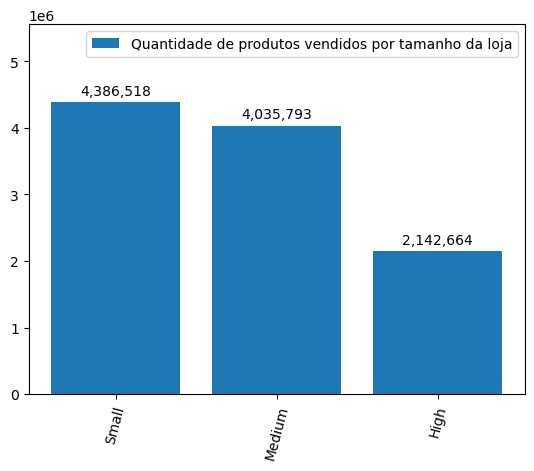

In [43]:
# Quantidade de produtos vendidos por tamanho da loja em termos de área coberta

#>>>>>>>>>>>>>>>>>>>> Gerando o gráfico

# Colocando os númenros na ordem crescente para gerar o gráfico

quant_produtos_por_tamanho_da_loja = base_de_dados2.groupby("Tamanho_Loja")["Vendas"].sum().sort_values(ascending=False)

# make data
x = quant_produtos_por_tamanho_da_loja.index
y = quant_produtos_por_tamanho_da_loja.values

#### Melhorando a formatação do annotate
# plot
fig, ax = plt.subplots()

ax.bar(x, y, label="Quantidade de produtos vendidos por tamanho da loja")
ax.tick_params('x',labelrotation=75)
ax.legend()

# Colocando os valores nos gráficos
## Precisamos fazer um loop para ir colocando os valores em cada uma das barras
for i in np.arange(0,3):
    plt.annotate('{:,.0f}'.format(y[i]), # formatando o número
                 (i,y[i]), # colocando a posição do elemento 
                 # outros parâmetros
                 ha="center", # alinhamento horizontal
                 xytext=(0,5), # deslocamento x,y do texto
                 textcoords="offset points" # referencial que vamos fazer o deslocamento
                )

ax.set(ylim=(0, 5555555))

plt.show()

*****FALSO*****: A maior quantidade de vendas, isto é, 4,386,518 pertencem as lojas Small(pequenas), seguido das lojas medium (médias) com 4,035,793 e lojas maiores com 2,142,664.

### H8:  Lojas localizadas em cidades do nível 1 vendem mais.

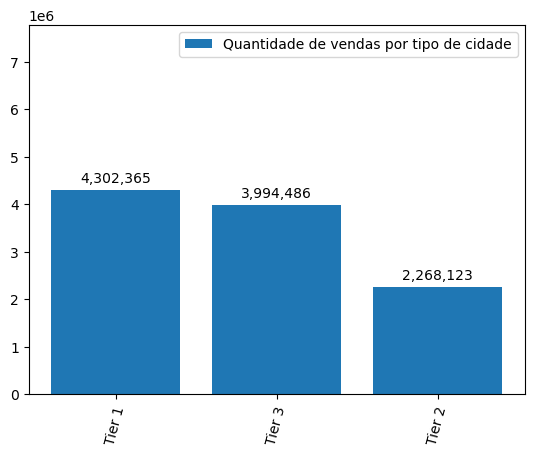

In [44]:
#>>>>>>>>>>>>>>>>>>>> Gerando o gráfico

# Colocando os númenros na ordem crescente para gerar o gráfico

quant_vendas_por_tipo_de_cidade = base_de_dados2.groupby("Tipo_cidade_localizada")["Vendas"].sum().sort_values(ascending=False)

# make data
x = quant_vendas_por_tipo_de_cidade.index
y = quant_vendas_por_tipo_de_cidade.values

#### Melhorando a formatação do annotate
# plot
fig, ax = plt.subplots()

ax.bar(x, y, label="Quantidade de vendas por tipo de cidade")
ax.tick_params('x',labelrotation=75)
ax.legend()

# Colocando os valores nos gráficos
## Precisamos fazer um loop para ir colocando os valores em cada uma das barras
for i in np.arange(0,3):
    plt.annotate('{:,.0f}'.format(y[i]), # formatando o número
                 (i,y[i]), # colocando a posição do elemento 
                 # outros parâmetros
                 ha="center", # alinhamento horizontal
                 xytext=(0,5), # deslocamento x,y do texto
                 textcoords="offset points" # referencial que vamos fazer o deslocamento
                )

ax.set(ylim=(0, 7777777))

plt.show()

*****VERDADEIRO*****: O total de vendas de todas as lojas localizadas em cidade do nível 1 foi de 4,302,365.

## 9.4 Análise Multivariada

### 9.4.1 Atributos numéricos

In [15]:
# Visualizando as variáveis numéricas

variaveis_numericas = pd.DataFrame(base_de_dados2.select_dtypes(exclude='number').columns.to_list())
variaveis_numericas

,0
0,ID_produto
1,Teor_gordura_produto
2,Categoria_produto
3,ID_da_Loja
4,Tamanho_Loja
5,Tipo_cidade_localizada
6,Tipo_ponto_venda


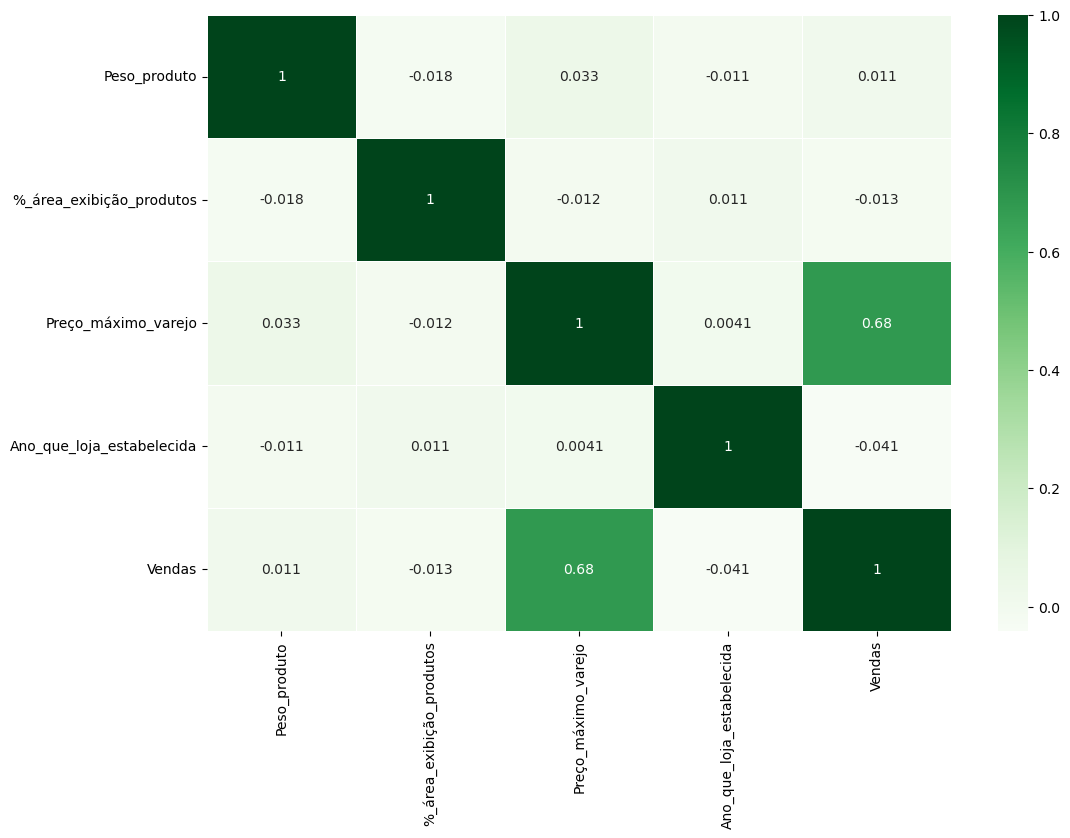

In [46]:
# Verificando a correlação entre as variáveis númericas

fig, ax = plt.subplots(figsize=(12,8))

_ = sns.heatmap(atributos_numericos.corr(), cmap = 'Greens', linewidth = 0.5, annot = True)

### 9.4.2 Atributos categóricos

In [47]:
# Visualizando as variáveis categoricas

variaveis_categoricas = pd.DataFrame(base_de_dados2.select_dtypes(exclude='number').columns.to_list())
variaveis_categoricas

,0
0,ID_produto
1,Teor_gordura_produto
2,Categoria_produto
3,ID_da_Loja
4,Tamanho_Loja
5,Tipo_cidade_localizada
6,Tipo_ponto_venda


In [48]:
# Função para executar um coeficiente de correlação com variáveis categóricas

def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    #correcting cramer's V bias
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

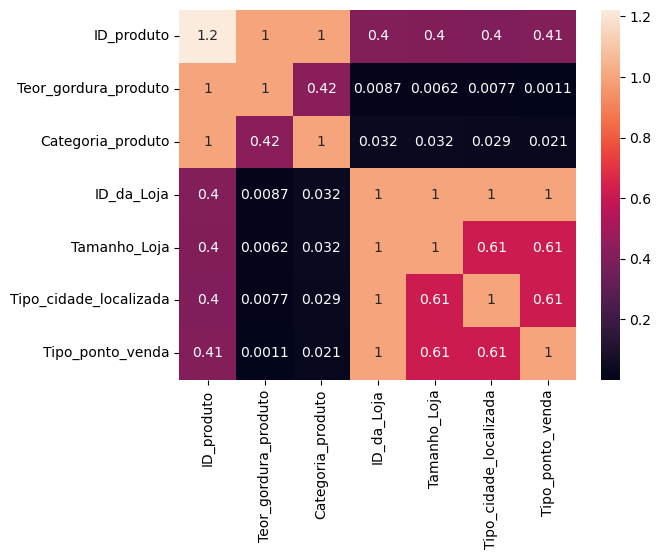

In [49]:
# Obtendo apenas dados categóricos
a = base_de_dados2.select_dtypes( include='object' )

# Calculando cramer V
a1 = cramer_v( a['ID_produto'], a['ID_produto'] )
a2 = cramer_v( a['ID_produto'], a['Teor_gordura_produto'] )
a3 = cramer_v( a['ID_produto'], a['Categoria_produto'] )
a4 = cramer_v( a['ID_produto'], a['ID_da_Loja'] )
a5 = cramer_v( a['ID_produto'], a['Tamanho_Loja'] )
a6 = cramer_v( a['ID_produto'], a['Tipo_cidade_localizada'] )
a7 = cramer_v( a['ID_produto'], a['Tipo_ponto_venda'] )

a8 = cramer_v( a['Teor_gordura_produto'], a['ID_produto'] )
a9 = cramer_v( a['Teor_gordura_produto'], a['Teor_gordura_produto'] )
a10 = cramer_v( a['Teor_gordura_produto'], a['Categoria_produto'] )
a11 = cramer_v( a['Teor_gordura_produto'], a['ID_da_Loja'] )
a12 = cramer_v( a['Teor_gordura_produto'], a['Tamanho_Loja'] )
a13 = cramer_v( a['Teor_gordura_produto'], a['Tipo_cidade_localizada'] )
a14 = cramer_v( a['Teor_gordura_produto'], a['Tipo_ponto_venda'] )

a15 = cramer_v( a['Categoria_produto'], a['ID_produto'] )
a16 = cramer_v( a['Categoria_produto'], a['Teor_gordura_produto'] )
a17 = cramer_v( a['Categoria_produto'], a['Categoria_produto'] )
a18 = cramer_v( a['Categoria_produto'], a['ID_da_Loja'] )
a19 = cramer_v( a['Categoria_produto'], a['Tamanho_Loja'] )
a20 = cramer_v( a['Categoria_produto'], a['Tipo_cidade_localizada'] )
a21 = cramer_v( a['Categoria_produto'], a['Tipo_ponto_venda'] )

a22 = cramer_v( a['ID_da_Loja'], a['ID_produto'] )
a23 = cramer_v( a['ID_da_Loja'], a['Teor_gordura_produto'] )
a24 = cramer_v( a['ID_da_Loja'], a['Categoria_produto'] )
a25 = cramer_v( a['ID_da_Loja'], a['ID_da_Loja'] )
a26 = cramer_v( a['ID_da_Loja'], a['Tamanho_Loja'] )
a27 = cramer_v( a['ID_da_Loja'], a['Tipo_cidade_localizada'] )
a28 = cramer_v( a['ID_da_Loja'], a['Tipo_ponto_venda'] )

a29 = cramer_v( a['Tamanho_Loja'], a['ID_produto'] )
a30 = cramer_v( a['Tamanho_Loja'], a['Teor_gordura_produto'] )
a31 = cramer_v( a['Tamanho_Loja'], a['Categoria_produto'] )
a32 = cramer_v( a['Tamanho_Loja'], a['ID_da_Loja'] )
a33 = cramer_v( a['Tamanho_Loja'], a['Tamanho_Loja'] )
a34 = cramer_v( a['Tamanho_Loja'], a['Tipo_cidade_localizada'] )
a35 = cramer_v( a['Tamanho_Loja'], a['Tipo_ponto_venda'] )

a36 = cramer_v( a['Tipo_cidade_localizada'], a['ID_produto'] )
a37 = cramer_v( a['Tipo_cidade_localizada'], a['Teor_gordura_produto'] )
a38 = cramer_v( a['Tipo_cidade_localizada'], a['Categoria_produto'] )
a39 = cramer_v( a['Tipo_cidade_localizada'], a['ID_da_Loja'] )
a40 = cramer_v( a['Tipo_cidade_localizada'], a['Tamanho_Loja'] )
a41 = cramer_v( a['Tipo_cidade_localizada'], a['Tipo_cidade_localizada'] )
a42 = cramer_v( a['Tipo_cidade_localizada'], a['Tipo_ponto_venda'] )

a43 = cramer_v( a['Tipo_ponto_venda'], a['ID_produto'] )
a44 = cramer_v( a['Tipo_ponto_venda'], a['Teor_gordura_produto'] )
a45 = cramer_v( a['Tipo_ponto_venda'], a['Categoria_produto'] )
a46 = cramer_v( a['Tipo_ponto_venda'], a['ID_da_Loja'] )
a47 = cramer_v( a['Tipo_ponto_venda'], a['Tamanho_Loja'] )
a48 = cramer_v( a['Tipo_ponto_venda'], a['Tipo_cidade_localizada'] )
a49 = cramer_v( a['Tipo_ponto_venda'], a['Tipo_ponto_venda'] )





# Conjunto de dados final
d = pd.DataFrame( {'ID_produto': [a1, a2, a3,a4,a5,a6,a7], 
                'Teor_gordura_produto': [a8, a9, a10,a11,a12,a13,a14],
                'Categoria_produto': [a15, a16, a17,a18,a19,a20,a21],
                'ID_da_Loja': [a22, a23, a24,a25,a26,a27,a28],
                'Tamanho_Loja': [a29, a30, a31,a32,a33,a34,a35],
                'Tipo_cidade_localizada': [a36, a37, a38,a39,a40,a41,a42],
                'Tipo_ponto_venda': [a43, a44, a45,a46,a47,a48,a49]  })
d = d.set_index( d.columns )

sns.heatmap( d, annot=True );

# 10. Preparação dos dados para aprendizagem dos modelos de Marchine Learning

## 10.1 Divisão entre atributos/previsores e classe

In [74]:
# Visualizando as colunas

# pd.DataFrame(base_de_dados2.columns)
base_de_dados2.columns

Index(['ID_produto', 'Peso_produto', 'Teor_gordura_produto',
       '%_área_exibição_produtos', 'Categoria_produto', 'Preço_máximo_varejo',
       'ID_da_Loja', 'Ano_que_loja_estabelecida', 'Tamanho_Loja',
       'Tipo_cidade_localizada', 'Tipo_ponto_venda', 'Vendas'],
      dtype='object')

In [12]:
# Separando as variaveis independentes

X_vendas = base_de_dados2.iloc[:, 0:11].values
X_vendas

# X_vendas = pd.DataFrame(X)

array([['FDA15', 9.3, 'Low Fat', ..., 'Medium', 'Tier 1',
        'Supermarket Type1'],
       ['DRC01', 5.92, 'Regular', ..., 'Medium', 'Tier 3',
        'Supermarket Type2'],
       ['FDN15', 17.5, 'Low Fat', ..., 'Medium', 'Tier 1',
        'Supermarket Type1'],
       ...,
       ['NCJ29', 10.6, 'Low Fat', ..., 'Small', 'Tier 2',
        'Supermarket Type1'],
       ['FDN46', 7.21, 'Regular', ..., 'Medium', 'Tier 3',
        'Supermarket Type2'],
       ['DRG01', 14.8, 'Low Fat', ..., 'Small', 'Tier 1',
        'Supermarket Type1']], dtype=object)

In [13]:
# Separando a variavel dependente

y_vendas = base_de_dados2.iloc[:, 11].values
y_vendas

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

## 10.2 Tratamento dos atributos categóricos (LabelEncoder, OneHotEncoder)

### 10.2.1  LabelEncoder

* Transforma os dados categóricos em dados númericos.

In [14]:
# Chamando a função  LabelEncoder

label_encoder_teste = LabelEncoder()

In [15]:
#  Criando uma variável do tipo LabelEncoder para cada um dos atributos

label_encoder_ID_produto = LabelEncoder()
label_encoder_Teor_gordura_produto = LabelEncoder()
label_encoder_Categoria_produto = LabelEncoder()
label_encoder_ID_da_Loja = LabelEncoder()
label_encoder_Tamanho_Loja = LabelEncoder()
label_encoder_Tipo_cidade_localizada = LabelEncoder()
label_encoder_Tipo_ponto_venda = LabelEncoder()

In [16]:
# Acessando a base de dados e aplicando o LabelEncoder() para as colunas categoricas

X_vendas[:,0] = label_encoder_ID_produto.fit_transform(X_vendas[:,0])
X_vendas[:,2] = label_encoder_Teor_gordura_produto.fit_transform(X_vendas[:,2])
X_vendas[:,4] = label_encoder_Categoria_produto.fit_transform(X_vendas[:,4])
X_vendas[:,6] = label_encoder_ID_da_Loja.fit_transform(X_vendas[:,6])
X_vendas[:,8] = label_encoder_Tamanho_Loja.fit_transform(X_vendas[:,8])
X_vendas[:,9] = label_encoder_Tipo_cidade_localizada.fit_transform(X_vendas[:,9])
X_vendas[:,10] = label_encoder_Tipo_ponto_venda.fit_transform(X_vendas[:,10])

In [17]:
# Visualizando os atributos numéricos após a aplicação do LabelEncoder

X_vendas

array([[154, 9.3, 0, ..., 1, 0, 0],
       [8, 5.92, 1, ..., 1, 2, 1],
       [656, 17.5, 0, ..., 1, 0, 0],
       ...,
       [1336, 10.6, 0, ..., 2, 1, 0],
       [675, 7.21, 1, ..., 1, 2, 1],
       [49, 14.8, 0, ..., 2, 0, 0]], dtype=object)

### 10.2.2 OneHotEncoder

In [18]:
# Criando a variável para trasnformação

onehotencoder_X_vendas = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,2,4,6,8,9,10])], remainder='passthrough')

In [19]:
# Aplicando nos registros dos atributos categóricos

X_vendas = onehotencoder_X_vendas.fit_transform(X_vendas).toarray()

In [20]:
# Visualizando registros categóricos trasnformados

X_vendas

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.60473010e-02, 2.49809200e+02, 1.99900000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.92782160e-02, 4.82692000e+01, 2.00900000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.67600750e-02, 1.41618000e+02, 1.99900000e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.51862710e-02, 8.51224000e+01, 2.00400000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.45220646e-01, 1.03133200e+02, 2.00900000e+03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.48782800e-02, 7.54670000e+01, 1.99700000e+03]])

In [21]:
# Verificando quantidade de linhas e colunas

X_vendas.shape

(4650, 1570)

## 10.3 Escalonamento dos Valores (padronizando utilizando o StandardScaler)

* Escalonamento de valores é deixá-los na mesma escala.

In [22]:
# Aplicando o escalonamento nos dados

scaler_X = StandardScaler()
X_vendas = scaler_X.fit_transform(X_vendas) 

In [23]:
# Visualizando atributos numéricos já com os dados na mesma escala

X_vendas

array([[-2.54082229e-02, -2.54082229e-02, -2.93420460e-02, ...,
        -1.16072001e+00,  1.73187396e+00, -2.57901329e-02],
       [-2.54082229e-02, -2.54082229e-02, -2.93420460e-02, ...,
        -1.08334056e+00, -1.49721850e+00,  1.32775521e+00],
       [-2.54082229e-02, -2.54082229e-02, -2.93420460e-02, ...,
        -1.14364929e+00, -1.57541821e-03, -2.57901329e-02],
       ...,
       [-2.54082229e-02, -2.54082229e-02, -2.93420460e-02, ...,
        -7.02347390e-01, -9.06753129e-01,  6.50982541e-01],
       [-2.54082229e-02, -2.54082229e-02, -2.93420460e-02, ...,
         1.93294306e+00, -6.18182431e-01,  1.32775521e+00],
       [-2.54082229e-02, -2.54082229e-02, -2.93420460e-02, ...,
        -4.70226666e-01, -1.06145284e+00, -2.96499202e-01]])

## 10.4 Divisão da base em treinamento e teste

In [24]:
# Fazendo a divisão entre treino e teste 

X_vendas_treino, X_vendas_teste, y_vendas_treino, y_vendas_teste = train_test_split(X_vendas, y_vendas, test_size = 0.15, random_state = 0)

* Colocou somente 15% dos dados para testar e o restante, 85%, para treinar os algoritmos.

In [25]:
# Visualizando o formato dos dados treinamento

X_vendas_treino.shape, y_vendas_treino.shape

((3952, 1570), (3952,))

* Temos 3952 registros e 1570 colunas para os atributos/caracteristicas e 3952 registros para a classe.

In [26]:
# Visualizando o formato dos dados teste

X_vendas_teste.shape, y_vendas_treino.shape

((698, 1570), (3952,))

* Temos 3952 registros para treinar e 698 para testar.

## 10.5 Salvando as variáveis com o pickle com os dados já tratados e divididos

In [27]:
with open('base_de_dados2.pkl', mode = 'wb') as f:
  pickle.dump([X_vendas_treino,y_vendas_treino,X_vendas_teste,y_vendas_teste], f)

# 11. ETAPA VI: Aplicando os Modelos de Machine Learning

**Algoritmos utilizados**

**1**. Regressão Linear

**2**. Modelo Regularizado de Regressão Linear - Lasso

**3**.  XGBRegressor

**4**. SVM

**5**. RandomForestRegressor

## 11.1 Regressão Linear

In [28]:
# Criando e treinando o modelo 

modelo = LinearRegression().fit(X_vendas_treino, y_vendas_treino )

In [29]:
# Predição

previsoes_teste = modelo.predict( X_vendas_teste )
previsoes_teste

array([ 4.37506250e+03,  1.35062500e+02,  1.93506250e+03,  2.63506250e+03,
        3.17506250e+03,  4.11106250e+03,  2.55106250e+03,  3.43062500e+02,
        1.85585055e+16,  2.31906250e+03,  1.75106250e+03,  2.28706250e+03,
        4.38306250e+03,  1.07106250e+03,  7.11062500e+02,  1.59106250e+03,
        1.54306250e+03,  1.27106250e+03,  3.17006250e+03, -2.69296206e+16,
        2.05106250e+03,  4.03106250e+03,  1.87106250e+03,  1.69106250e+03,
        2.81506250e+03, -9.81374981e+14,  2.89506250e+03,  6.59906250e+03,
        2.83806250e+03,  2.06306250e+03,  1.73106250e+03,  1.13506250e+03,
        4.87062500e+02,  2.15106250e+03,  3.00306250e+03,  1.03488618e+17,
        4.48706250e+03,  3.13506250e+03,  2.10706250e+03,  4.35163004e+17,
        1.59506250e+03,  5.13506250e+03,  3.04706250e+03,  2.74306250e+03,
        1.18306250e+03, -4.38009800e+17,  1.15906250e+03,  1.96706250e+03,
        4.87062500e+02,  2.49506250e+03,  2.95062500e+02, -2.40937500e+02,
        1.17506250e+03,  

In [30]:
# Valores reais da base de teste

y_vendas_teste

array([2283.0282, 1312.9576,  360.8636, 1528.011 , 1151.1682, 1182.4608,
       2302.3364,  960.7494, 1428.141 , 5400.9696, 1653.8472, 2087.283 ,
       5313.7498,  227.7036,  111.8544, 3137.2496, 1557.972 , 1004.0264,
       2874.9244, 2999.429 ,  992.7078, 3110.6176, 2093.941 , 2556.672 ,
       3691.1952, 5944.2624, 2906.217 , 3755.112 , 4693.89  ,  908.1512,
        988.713 , 2553.343 , 1198.44  , 1235.059 , 2316.984 , 1438.128 ,
       6183.9504, 5257.1568, 1278.336 , 5099.3622,  391.4904, 5580.7356,
       2954.1546, 5005.4844, 3062.0142, 5502.837 , 2220.443 , 2596.62  ,
       1857.582 ,  517.3266,  512.666 ,  527.9794, 1332.9316, 1821.6288,
       4327.7   , 1255.6988, 2530.7058,  865.54  ,  904.8222, 1789.6704,
       1025.332 , 2388.8904, 3608.636 , 3877.6192, 1794.331 , 2041.3428,
       1214.4192,  521.3214,  312.2602, 2218.4456, 3315.0182, 1867.569 ,
        340.2238, 1411.496 , 2463.46  , 3488.1262,  446.7518, 1188.453 ,
       1150.5024,  309.597 , 1070.6064, 1145.176 , 

In [31]:
# Performance

scores_regressao = pd.DataFrame(columns=['Nome do Modelo','MAE', 'MAPE', 'RMSE'])
MAE = mean_absolute_error(y_vendas_teste, previsoes_teste)
MAPE = np.mean(np.abs((y_vendas_teste - previsoes_teste) / previsoes_teste)) * 100
RMSE = mean_squared_error(y_vendas_teste,previsoes_teste,squared=False)
nome_do_modelo = 'Regressão Linear'
scores_regressao.loc[len(scores_regressao)] = [nome_do_modelo,MAE,MAPE,RMSE]
scores_regressao

,Nome do Modelo,MAE,MAPE,RMSE
0,Regressão Linear,9.712249e+15,90.433356,5.212047e+16


## 11.2 Modelo Regularizado de Regressão Linear - Lasso

In [72]:
# Criando e treinando o modelo

modelo = Lasso( alpha = 0.01 ).fit(X_vendas_treino, y_vendas_treino )

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.089e+08, tolerance: 8.767e+05
  model = cd_fast.enet_coordinate_descent(


In [73]:
# Predição

previsoes_teste = modelo.predict( X_vendas_teste )
previsoes_teste

array([4165.89196095,  283.20466555, 1805.38769177, 2629.79705264,
       2964.14065191, 5255.51777831, 2590.73028914,  647.05184295,
       2191.3019203 , 2348.69499855, 1671.07822397, 2156.30515689,
       4831.89435079,  743.67013178,  636.74879797, 1667.49889615,
       1666.30034629, 1071.67132717, 3029.43493402, 2179.61641692,
       2041.78670195, 3691.67280966, 1799.66587259, 1432.30919119,
       2757.65915882, 2475.87099422, 2406.7618225 , 6311.69909857,
       2843.96056016, 1979.15537454, 1825.35808483, 1190.5636408 ,
        719.98224624, 2127.2640689 , 2992.2537866 , 2189.22766211,
       4579.95354732, 3461.22329558, 1748.87809725, 2381.27518772,
       1398.99089377, 5125.46109848, 2782.01608167, 2665.49499458,
       1135.09122626, 2241.12623141, 1369.10722827, 1751.91389043,
        613.53803437, 2486.67482044,  639.54092462,  101.74149994,
       1196.54549218, 1302.24167228, 1134.81425808,  911.55685767,
       1663.04146573,  462.83449799, 1018.60364733, 2174.03077

In [33]:
# Valores reais da base de teste

y_vendas_teste

array([2283.0282, 1312.9576,  360.8636, 1528.011 , 1151.1682, 1182.4608,
       2302.3364,  960.7494, 1428.141 , 5400.9696, 1653.8472, 2087.283 ,
       5313.7498,  227.7036,  111.8544, 3137.2496, 1557.972 , 1004.0264,
       2874.9244, 2999.429 ,  992.7078, 3110.6176, 2093.941 , 2556.672 ,
       3691.1952, 5944.2624, 2906.217 , 3755.112 , 4693.89  ,  908.1512,
        988.713 , 2553.343 , 1198.44  , 1235.059 , 2316.984 , 1438.128 ,
       6183.9504, 5257.1568, 1278.336 , 5099.3622,  391.4904, 5580.7356,
       2954.1546, 5005.4844, 3062.0142, 5502.837 , 2220.443 , 2596.62  ,
       1857.582 ,  517.3266,  512.666 ,  527.9794, 1332.9316, 1821.6288,
       4327.7   , 1255.6988, 2530.7058,  865.54  ,  904.8222, 1789.6704,
       1025.332 , 2388.8904, 3608.636 , 3877.6192, 1794.331 , 2041.3428,
       1214.4192,  521.3214,  312.2602, 2218.4456, 3315.0182, 1867.569 ,
        340.2238, 1411.496 , 2463.46  , 3488.1262,  446.7518, 1188.453 ,
       1150.5024,  309.597 , 1070.6064, 1145.176 , 

In [74]:
# Performance

scores_lasso = pd.DataFrame(columns=['Nome do Modelo','MAE', 'MAPE', 'RMSE'])
MAE = mean_absolute_error(y_vendas_teste, previsoes_teste)
MAPE = np.mean(np.abs((y_vendas_teste - previsoes_teste) / previsoes_teste)) * 100
RMSE = mean_squared_error(y_vendas_teste,previsoes_teste,squared=False)
nome_do_modelo = 'Modelo Regularizado de Regressão Linear'
scores_lasso.loc[len(scores_lasso)] = [nome_do_modelo, MAE,MAPE,RMSE]
scores_lasso

,Nome do Modelo,MAE,MAPE,RMSE
0,Modelo Regularizado de Regressão Linear,982.619376,85.312088,1349.915494


## 11.3 XGBRegressor

In [75]:
# Criando e treinando o modelo

modelo = XGBRegressor( objective='reg:squarederror',
                              n_estimators=100,
                              eta=0.01, 
                              max_depth=10, 
                              subsample=0.7,
                              colsample_bytee=0.9 ).fit(X_vendas_treino,y_vendas_treino)


[14:04:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample_bytee" } are not used.



In [76]:
# Predição

previsoes_teste = modelo.predict( X_vendas_teste )
previsoes_teste

array([2806.4417 ,  569.0822 , 1697.725  , 1648.5757 , 1711.7706 ,
       2206.4463 , 1363.2373 ,  710.2486 , 1389.2843 , 2370.3308 ,
        922.2023 , 1151.1353 , 2515.0664 ,  411.90247,  409.51227,
       1009.9465 , 1361.4814 ,  739.8793 , 1677.262  , 1733.7438 ,
       1518.1621 , 2126.4846 , 1299.7205 , 1465.2456 , 1791.5027 ,
       2513.0984 , 1345.7142 , 2707.0696 , 1814.2885 ,  888.80365,
        862.6854 , 1426.1891 ,  532.298  , 1650.3605 , 1896.9648 ,
       1542.7006 , 2715.277  , 2082.0571 ,  909.41174, 2269.5974 ,
        745.93744, 2513.     , 1546.24   , 2661.1956 , 1546.0693 ,
       2094.3735 ,  900.8952 ,  916.6902 ,  856.6479 , 1771.2162 ,
        455.94025,  262.48236,  925.01215, 1061.3905 , 2147.3086 ,
        494.97717, 1178.5228 ,  192.29996,  973.48615, 1398.8359 ,
        962.9688 , 1843.3119 , 1718.9336 , 1687.7023 , 1572.9799 ,
       1485.9968 ,  512.6148 , 1737.6597 ,  400.3284 ,  816.537  ,
       2601.3616 ,  964.22876,  382.40564, 1459.9258 , 1323.23

In [77]:
# Valores reais da base de teste

y_vendas_teste

array([2283.0282, 1312.9576,  360.8636, 1528.011 , 1151.1682, 1182.4608,
       2302.3364,  960.7494, 1428.141 , 5400.9696, 1653.8472, 2087.283 ,
       5313.7498,  227.7036,  111.8544, 3137.2496, 1557.972 , 1004.0264,
       2874.9244, 2999.429 ,  992.7078, 3110.6176, 2093.941 , 2556.672 ,
       3691.1952, 5944.2624, 2906.217 , 3755.112 , 4693.89  ,  908.1512,
        988.713 , 2553.343 , 1198.44  , 1235.059 , 2316.984 , 1438.128 ,
       6183.9504, 5257.1568, 1278.336 , 5099.3622,  391.4904, 5580.7356,
       2954.1546, 5005.4844, 3062.0142, 5502.837 , 2220.443 , 2596.62  ,
       1857.582 ,  517.3266,  512.666 ,  527.9794, 1332.9316, 1821.6288,
       4327.7   , 1255.6988, 2530.7058,  865.54  ,  904.8222, 1789.6704,
       1025.332 , 2388.8904, 3608.636 , 3877.6192, 1794.331 , 2041.3428,
       1214.4192,  521.3214,  312.2602, 2218.4456, 3315.0182, 1867.569 ,
        340.2238, 1411.496 , 2463.46  , 3488.1262,  446.7518, 1188.453 ,
       1150.5024,  309.597 , 1070.6064, 1145.176 , 

In [78]:
# Performance

scores_xgbregressor = pd.DataFrame(columns=['Nome do Modelo','MAE', 'MAPE', 'RMSE'])
MAE = mean_absolute_error(y_vendas_teste, previsoes_teste)
MAPE = np.mean(np.abs((y_vendas_teste - previsoes_teste) / previsoes_teste)) * 100
RMSE = mean_squared_error(y_vendas_teste,previsoes_teste,squared=False)
nome_do_modelo = 'XGBRegressor'
scores_xgbregressor.loc[len(scores_xgbregressor)] = [nome_do_modelo,MAE,MAPE,RMSE]
scores_xgbregressor

,Nome do Modelo,MAE,MAPE,RMSE
0,XGBRegressor,1031.112718,73.927351,1454.877448


## 11.4 SVM

In [79]:
# Criando e treinando o modelo

modelo = SVR().fit(X_vendas_treino, y_vendas_treino )

In [80]:
# Predição

previsoes_teste = modelo.predict( X_vendas_teste )
previsoes_teste

array([1953.21987364, 1946.33629781, 1951.9742431 , 1948.48050786,
       1954.37661676, 1950.17036202, 1952.59455804, 1946.9605602 ,
       1945.04102273, 1948.359341  , 1947.7032733 , 1948.83287279,
       1952.45913693, 1947.98715187, 1947.11604372, 1951.66985948,
       1950.77824758, 1947.96501655, 1951.47645392, 1945.06219991,
       1949.08458747, 1952.4298884 , 1950.02950302, 1947.5656151 ,
       1953.76079151, 1947.59459322, 1950.88051465, 1954.15180285,
       1952.07272281, 1947.82292536, 1947.38492103, 1950.16956303,
       1947.29849251, 1949.0822536 , 1947.91333284, 1945.04325381,
       1955.19490404, 1951.77548212, 1948.12233478, 1945.10585611,
       1947.83092065, 1952.7719548 , 1949.20364344, 1949.97350313,
       1946.39543313, 1945.07271775, 1947.86735712, 1950.79255398,
       1945.6256338 , 1951.77817367, 1947.22068879, 1946.36761197,
       1947.97570559, 1947.59929696, 1946.7976164 , 1947.44278867,
       1949.20458897, 1946.82690059, 1946.70743946, 1949.14355

In [81]:
# Valores reais da base de teste

y_vendas_teste

array([2283.0282, 1312.9576,  360.8636, 1528.011 , 1151.1682, 1182.4608,
       2302.3364,  960.7494, 1428.141 , 5400.9696, 1653.8472, 2087.283 ,
       5313.7498,  227.7036,  111.8544, 3137.2496, 1557.972 , 1004.0264,
       2874.9244, 2999.429 ,  992.7078, 3110.6176, 2093.941 , 2556.672 ,
       3691.1952, 5944.2624, 2906.217 , 3755.112 , 4693.89  ,  908.1512,
        988.713 , 2553.343 , 1198.44  , 1235.059 , 2316.984 , 1438.128 ,
       6183.9504, 5257.1568, 1278.336 , 5099.3622,  391.4904, 5580.7356,
       2954.1546, 5005.4844, 3062.0142, 5502.837 , 2220.443 , 2596.62  ,
       1857.582 ,  517.3266,  512.666 ,  527.9794, 1332.9316, 1821.6288,
       4327.7   , 1255.6988, 2530.7058,  865.54  ,  904.8222, 1789.6704,
       1025.332 , 2388.8904, 3608.636 , 3877.6192, 1794.331 , 2041.3428,
       1214.4192,  521.3214,  312.2602, 2218.4456, 3315.0182, 1867.569 ,
        340.2238, 1411.496 , 2463.46  , 3488.1262,  446.7518, 1188.453 ,
       1150.5024,  309.597 , 1070.6064, 1145.176 , 

In [82]:
# Performance

scores_svm = pd.DataFrame(columns=['Nome do Modelo','MAE', 'MAPE', 'RMSE'])
MAE = mean_absolute_error(y_vendas_teste, previsoes_teste)
MAPE = np.mean(np.abs((y_vendas_teste - previsoes_teste) / previsoes_teste)) * 100
RMSE = mean_squared_error(y_vendas_teste,previsoes_teste,squared=False)
nome_do_modelo = 'SVM'
scores_svm.loc[len(scores_svm)] = [nome_do_modelo,MAE,MAPE,RMSE]
scores_svm

,Nome do Modelo,MAE,MAPE,RMSE
0,SVM,1190.476245,61.063443,1568.72746


## 11.5 RandomForestRegressor

In [83]:
# Criando e treinando o modelo

modelo = RandomForestRegressor().fit(X_vendas_treino, y_vendas_treino )

In [85]:
# Predição

previsoes_teste = modelo.predict( X_vendas_teste )
previsoes_teste

array([4090.195824, 1007.927988, 2062.908062, 2488.52737 , 2784.728474,
       4152.654522, 2544.461228,  929.603276, 1898.355592, 3638.06436 ,
       1593.19282 , 1846.170188, 4934.130614,  661.818516,  649.408004,
       1738.050926, 1755.135354, 1142.892306, 2992.431442, 2877.12154 ,
       2261.070116, 3414.348902, 1657.20949 , 2071.80315 , 2737.643098,
       4015.519696, 2472.288508, 4993.207048, 2359.581884, 1476.131864,
       1568.817882, 2177.359082,  828.161988, 2579.335832, 2547.357458,
       2324.081428, 3949.552232, 3669.92289 , 2099.773408, 3284.304846,
       1020.80456 , 3869.6296  , 2470.723878, 4135.729886, 2309.287352,
       3153.075666, 1274.947078, 1418.373714, 1279.474518, 2396.993186,
        781.675832,  402.522706, 1517.544624, 1468.734826, 3953.367266,
        551.076002, 1905.013592,  282.991632, 1485.26664 , 2024.56464 ,
       1228.241208, 2777.870734, 2568.75627 , 2359.482014, 2158.98966 ,
       2098.554994,  870.646686, 2620.169346,  586.183636, 1135.

In [86]:
# Valores reais da base de teste

y_vendas_teste

array([2283.0282, 1312.9576,  360.8636, 1528.011 , 1151.1682, 1182.4608,
       2302.3364,  960.7494, 1428.141 , 5400.9696, 1653.8472, 2087.283 ,
       5313.7498,  227.7036,  111.8544, 3137.2496, 1557.972 , 1004.0264,
       2874.9244, 2999.429 ,  992.7078, 3110.6176, 2093.941 , 2556.672 ,
       3691.1952, 5944.2624, 2906.217 , 3755.112 , 4693.89  ,  908.1512,
        988.713 , 2553.343 , 1198.44  , 1235.059 , 2316.984 , 1438.128 ,
       6183.9504, 5257.1568, 1278.336 , 5099.3622,  391.4904, 5580.7356,
       2954.1546, 5005.4844, 3062.0142, 5502.837 , 2220.443 , 2596.62  ,
       1857.582 ,  517.3266,  512.666 ,  527.9794, 1332.9316, 1821.6288,
       4327.7   , 1255.6988, 2530.7058,  865.54  ,  904.8222, 1789.6704,
       1025.332 , 2388.8904, 3608.636 , 3877.6192, 1794.331 , 2041.3428,
       1214.4192,  521.3214,  312.2602, 2218.4456, 3315.0182, 1867.569 ,
        340.2238, 1411.496 , 2463.46  , 3488.1262,  446.7518, 1188.453 ,
       1150.5024,  309.597 , 1070.6064, 1145.176 , 

In [87]:
# Performance

scores_random_forest = pd.DataFrame(columns=['Nome do Modelo','MAE', 'MAPE', 'RMSE'])
MAE = mean_absolute_error(y_vendas_teste, previsoes_teste)
MAPE = np.mean(np.abs((y_vendas_teste - previsoes_teste) / previsoes_teste)) * 100
RMSE = mean_squared_error(y_vendas_teste,previsoes_teste,squared=False)
nome_do_modelo = ' RandomForestRegressor'
scores_random_forest .loc[len(scores_random_forest )] = [nome_do_modelo,MAE,MAPE,RMSE]
scores_random_forest 

,Nome do Modelo,MAE,MAPE,RMSE
0,RandomForestRegressor,857.128991,40.565141,1171.416928


# 12. ETAPA VII: Avaliação dos algoritmos

## 12.1 Performance dos Algoritmos

In [88]:
# Visualizando e comparando o desempenho dos modelos

resultados_modelos = pd.concat( [scores_regressao,scores_lasso,scores_xgbregressor,scores_svm,scores_random_forest ] )
resultados_modelos.sort_values('MAPE').ascending=False
resultados_modelos

,Nome do Modelo,MAE,MAPE,RMSE
0,Regressão Linear,9.712249e+15,90.433356,5.212047e+16
0,Modelo Regularizado de Regressão Linear,9.826194e+02,85.312088,1.349915e+03
0,XGBRegressor,1.031113e+03,73.927351,1.454877e+03
0,SVM,1.190476e+03,61.063443,1.568727e+03
0,RandomForestRegressor,8.571290e+02,40.565141,1.171417e+03


## 12.2 Ajuste dos parâmetros com RandomizedSearchCV e Validação Cruzada

### 12.2.1 Visualizando tamanho da base de treinamento e da base de teste

In [89]:
# Visualizando tamanho da base de treinamento

X_vendas_treino.shape, y_vendas_treino.shape

((3952, 1570), (3952,))

In [90]:
# Visualizando tamanho da base de teste

X_vendas_teste.shape, y_vendas_teste.shape

((698, 1570), (698,))

* Ou seja, anteriormente estávamos trabalhando com 3952 registros para treinar o algoritmo e 698 para testar. Tínhamos isso quando estávamos trabalhando com a divisão das bases de dados, isto é, uma parte dos dados para treinar e a outra parte para testar.


* Contudo, na validação cruzada nós utilizamos a base de dados inteira, não utilizamos essa divisão, pois durante o processo de validação cruzada o próprio algoritmo vai fazer as quebras/divisões da base de dados. Então o que vamos precisar fazer agora é concatenar essas duas variáveis (treinamento e teste) para termos a base de dados completa.

### 12.2.2 Juntando as bases de treino e teste

In [91]:
# Concatenando os dados (juntando os dados de treino que haviamos separado anteriormente para ficar uma base só)

X_vendas = np.concatenate((X_vendas_treino, X_vendas_teste), axis = 0)
X_vendas.shape

(4650, 1570)

* Colocamos axis = 0, pois queremos concatenar as linhas. Se colocar axis = 1 ele irá concatenar as colunas e não terá o resultado desejado.


* Perceba que agora temos os 4650 registros na mesma variável.

In [92]:
# Visualizando essa variável X (atributos)

X_vendas

array([[-0.02540822, -0.02540822, -0.02934205, ..., -0.99700035,
         1.91533012, -0.2964992 ],
       [-0.02540822, -0.02540822, -0.02934205, ...,  0.22717818,
         1.04700322, -1.65004455],
       [-0.02540822, -0.02540822, -0.02934205, ..., -0.23777261,
         0.82779216,  0.65098254],
       ...,
       [-0.02540822, -0.02540822, -0.02934205, ..., -0.72059689,
         0.4826795 , -1.65004455],
       [-0.02540822, -0.02540822, -0.02934205, ..., -0.5628814 ,
        -0.00747796, -0.02579013],
       [-0.02540822, -0.02540822, -0.02934205, ...,  0.77328191,
         0.81177007, -1.65004455]])

In [93]:
# Concatenando os dados (juntando os dados de  teste que haviamos separado anteriormente para ficar uma base só)

y_vendas = np.concatenate((y_vendas_treino, y_vendas_teste), axis = 0)
y_vendas.shape

(4650,)

* Agora temos os 4650 registros completos da classe.

In [94]:
# Visualizando essa variável y (classe)

y_vendas

array([2878.2534, 4969.5312, 4247.804 , ..., 2069.3064, 2681.8424,
       4247.804 ])

### 12.2.3 Aplicação do RandomizedSearchCV para descobrirmos os melhores parâmetros para cada um dos algoritmos

> * Existem três estratégias para encontrar o conjunto de parâmetros que maximiza a aprendizagem do modelo: 

**1**. **Random Search**: Define os valores para cada um dos parâmetros de forma aleatória. Uma das vantagens é que ele mais rápido se comparado com as outras técnicas. Porém, dentre as desvantagens está o fato de que ele acaba selecionando o mesmo conjunto de valores que já foi testado em outra interação. Além disso, uma outra desvantagem é que ele pode nunca conseguir encontrar o melhor conjunto de valores que maximiza a aprendizagem do modelo, porque como a pesquisa é aleatória pode ser que por causa dessa aleatoriedade ele não encontre o melhor conjunto de parâmetros.

**2**. **Grid Search**: Define todas as combinações possíveis de valores que os parâmetros podem assumir. A vantagem é que ele realmente consegue encontrar o melhor conjunto de valores para cada um dos parâmetros que maximiza o modelo e, caso ele não encontre, fica próximo disso. Contudo, pelo fato de ele buscar fazer todas as combinações possíveis, demora muito tempo.

**3**. **Bayesian**: Define os valores dos parâmetros seguindo a teoria de Bayes. Ele busca encontrar o melhor conjunto de parâmetros baseado na aprendizagem anterior. Ele não faz nada aleatório como o Random Search e também não testa todas as possibilidades como o Grid Search, mas busca encontrar o melhor conjunto baseado na aprendizagem anterior. Ele é mais rápido do que o Grid Search, porém é mais lento do que o Random Search. 

* Por ser mais rápido que os demais, tentei utilizar o Random Search, porém mesmo rodando o códigos tanto pelo jupyter notebook na minha máquina pessoal quanto pelo google colab, foi demorado e não saiu o resultado. Por isso, decidir prosseguir com a implementação da validação cruzada sem fazer esse ajuste de parâmetros.

### 12.2.4 Implementação da Validação Cruzada, aplicação dos modelos e visualização dos erros

In [96]:
# Validação Cruzada

for i in range(5):
  print(i)
  kfold = KFold(n_splits=2, shuffle=True, random_state=i)

regressao = LinearRegression()
cross_val_score(regressao, X_vendas, y_vendas, cv = kfold)
lasso = Lasso( alpha = 0.01 )
cross_val_score(lasso,X_vendas, y_vendas, cv = kfold)
xgbregressor = XGBRegressor( objective='reg:squarederror', n_estimators=100, eta=0.01, max_depth=10, subsample=0.7,colsample_bytee=0.9 )
cross_val_score(xgbregressor,X_vendas, y_vendas, cv = kfold)
svm = SVR()
cross_val_score(svm,X_vendas, y_vendas, cv = kfold)
random_forest_regressor = RandomForestRegressor()
cross_val_score(random_forest_regressor,X_vendas, y_vendas, cv = kfold)

# Regressão Linear

#modelo = LinearRegression().fit(X_vendas, y_vendas)
#previsoes_validacao = modelo.predict(X_vendas)
#y_vendas
#scores_regressao = pd.DataFrame(columns=['Nome do Modelo','MAE', 'MAPE', 'RMSE'])
#MAE = mean_absolute_error(y_vendas,previsoes_validacao)
#MAPE = np.mean(np.abs((y_vendas - previsoes_validacao) / previsoes_validacao)) * 100
#RMSE = mean_squared_error(y_vendas,previsoes_validacao,squared=False)
#nome_do_modelo = 'Regressão Linear'
#scores_regressao.loc[len(scores_regressao)] = [nome_do_modelo,MAE,MAPE,RMSE]


#Lasso

modelo = Lasso( alpha = 0.01 ).fit(X_vendas, y_vendas)
previsoes_validacao = modelo.predict(X_vendas)
y_vendas
scores_lasso = pd.DataFrame(columns=['Nome do Modelo','MAE', 'MAPE', 'RMSE'])
MAE = mean_absolute_error(y_vendas,previsoes_validacao)
MAPE = np.mean(np.abs((y_vendas - previsoes_validacao) / previsoes_validacao)) * 100
RMSE = mean_squared_error(y_vendas,previsoes_validacao,squared=False)
nome_do_modelo = 'Modelo Regularizado de Regressão Linear'
scores_lasso.loc[len(scores_lasso)] = [nome_do_modelo, MAE,MAPE,RMSE]

# XGBRegressor

modelo = XGBRegressor( objective='reg:squarederror', n_estimators=100, eta=0.01, max_depth=10, subsample=0.7,colsample_bytee=0.9).fit(X_vendas, y_vendas)
previsoes_validacao = modelo.predict(X_vendas)
y_vendas
scores_xgbregressor = pd.DataFrame(columns=['Nome do Modelo','MAE', 'MAPE', 'RMSE'])
MAE = mean_absolute_error(y_vendas,previsoes_validacao)
MAPE = np.mean(np.abs((y_vendas - previsoes_validacao) / previsoes_validacao)) * 100
RMSE = mean_squared_error(y_vendas,previsoes_validacao,squared=False)
nome_do_modelo = 'XGBRegressor'
scores_xgbregressor.loc[len(scores_xgbregressor)] = [nome_do_modelo,MAE,MAPE,RMSE]

# SVM

modelo =  SVR().fit(X_vendas, y_vendas )
previsoes_validacao = modelo.predict(X_vendas)
y_vendas
scores_svm = pd.DataFrame(columns=['Nome do Modelo','MAE', 'MAPE', 'RMSE'])
MAE = mean_absolute_error(y_vendas,previsoes_validacao)
MAPE = np.mean(np.abs((y_vendas - previsoes_validacao) / previsoes_validacao)) * 100
RMSE = mean_squared_error(y_vendas,previsoes_validacao,squared=False)
nome_do_modelo = 'SVM'
scores_svm.loc[len(scores_svm)] = [nome_do_modelo,MAE,MAPE,RMSE]

# Random Forest

modelo = RandomForestRegressor().fit(X_vendas, y_vendas)
previsoes_validacao = modelo.predict(X_vendas)
y_vendas
scores_random_forest = pd.DataFrame(columns=['Nome do Modelo','MAE', 'MAPE', 'RMSE'])
MAE = mean_absolute_error(y_vendas,previsoes_validacao)
MAPE = np.mean(np.abs((y_vendas - previsoes_validacao) / previsoes_validacao)) * 100
RMSE = mean_squared_error(y_vendas,previsoes_validacao,squared=False)
nome_do_modelo = ' RandomForestRegressor'
scores_random_forest .loc[len(scores_random_forest )] = [nome_do_modelo,MAE,MAPE,RMSE]

#Resultados

resultados_validacao = pd.concat( [scores_lasso,scores_xgbregressor,scores_svm,scores_random_forest ] )
resultados_validacao.sort_values('MAPE').ascending=False
resultados_validacao


0
1
2
3
4


C:\Users\HOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.256e+08, tolerance: 5.285e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\HOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.624e+08, tolerance: 5.147e+05
  model = cd_fast.enet_coordinate_descent(


[14:10:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample_bytee" } are not used.

[14:10:15] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample_bytee" } are not used.



C:\Users\HOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.328e+07, tolerance: 1.043e+06
  model = cd_fast.enet_coordinate_descent(


[14:11:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "colsample_bytee" } are not used.



,Nome do Modelo,MAE,MAPE,RMSE
0,Modelo Regularizado de Regressão Linear,642.516319,29.954395,887.124916
0,XGBRegressor,962.858760,65.156789,1357.912689
0,SVM,1165.179999,60.036330,1532.306525
0,RandomForestRegressor,315.460719,15.383423,433.795959


## 12.3 Comparando resultados com a divisão treino e teste e com a implementação da validação cruzada

In [97]:
# Resultados com a divisão dos dados em treino e teste

resultados_modelos

,Nome do Modelo,MAE,MAPE,RMSE
0,Regressão Linear,9.712249e+15,90.433356,5.212047e+16
0,Modelo Regularizado de Regressão Linear,9.826194e+02,85.312088,1.349915e+03
0,XGBRegressor,1.031113e+03,73.927351,1.454877e+03
0,SVM,1.190476e+03,61.063443,1.568727e+03
0,RandomForestRegressor,8.571290e+02,40.565141,1.171417e+03


In [98]:
# Resultados com a implementação da validação cruzada

resultados_validacao

,Nome do Modelo,MAE,MAPE,RMSE
0,Modelo Regularizado de Regressão Linear,642.516319,29.954395,887.124916
0,XGBRegressor,962.858760,65.156789,1357.912689
0,SVM,1165.179999,60.036330,1532.306525
0,RandomForestRegressor,315.460719,15.383423,433.795959


* O modelo que obteve o menor erro tanto com a validação cruzada tanto com a divisão em treino e teste foi o RandomForestRegressor que será o modelo escolhido.

# 13. ETAPA VIII: Traduzindo desempenho dos modelos escolhidos para métricas de negócios

## 13.1 Prevendo as vendas  com o modelo escolhido

### 13.1.1 Prevendo as vendas por loja  com o RandomForestRegressor

In [42]:
# Random Forest

# Criando e treinando o modelo
modelo = RandomForestRegressor().fit(X_vendas, y_vendas)

# Fazendo as previsões
previsoes_validacao = modelo.predict(X_vendas)

# Visualizando os resultados reais para comparar com as previsões
y_vendas

#Performance
scores_random_forest = pd.DataFrame(columns=['Nome do Modelo','MAE', 'MAPE', 'RMSE'])
MAE = mean_absolute_error(y_vendas,previsoes_validacao)
MAPE = np.mean(np.abs((y_vendas - previsoes_validacao) / previsoes_validacao)) * 100
RMSE = mean_squared_error(y_vendas,previsoes_validacao,squared=False)
nome_do_modelo = ' RandomForestRegressor'
scores_random_forest .loc[len(scores_random_forest )] = [nome_do_modelo,MAE,MAPE,RMSE]
scores_random_forest

,Nome do Modelo,MAE,MAPE,RMSE
0,RandomForestRegressor,313.811619,15.297983,431.734008


In [58]:
# Fazendo as previsões
previsoes_validacao = modelo.predict(X_vendas)
previsoes_validacao

array([4400.2722  ,  515.269278, 1994.363952, ..., 1280.83275 ,
       1696.385162,  952.047394])

In [98]:
# Total das vendas previstas

previsoes_validacao.sum()

10527423.994302

In [110]:
# Total de vendas reais 

total_vendas = base_de_dados2[['Vendas']].sum()
total_vendas = 1.056497e+07
print("{:f}".format(total_vendas)) 

10564970.000000


## 13.2 Impacto do modelo sobre o negócio

Existem duas maneiras de verificar o impacto de um modelo preditivo sobre o negócio, ou seja, o quanto esse modelo trará de retorno para a empresa, seja retorno financeiro através do através do incremento de receitas ou redução de custos, seja pela diminição no tempo de determinado processo, contribuindo para o aumento da produtividade, dentre outros. 

**1**. **A primeira maneira é comparar a performance do modelo de marchine learning com as métricas já utilizadas pela empresa**:

* Existem empresas que possuem seus modelos de previsão seja de receitas, de vendas, de clientes, dentre outros, uma vez que as elas se baseiam em dados futuros para planejar sua operação. Sendo assim, uma alternativa é comparar a performance do modelo já utilizado na empresa com o modelo de marchine learning e, assim, constatar se com o modelo de marchine learning há um menor erro nas previsões em comparação com o modelo existente na empresa, se a acurácia é melhor, se com esse modelo a empresa pode evitar desperdícios etc.


**2**. **Uma outra maneira é através do próprio modelo de marchine learning verificar o incremento que o modelo trás para o negócio, seja incremento de receita, redução de custo, redução de tempo, perda de clientes, dentre outros.**:

* O modelo que teve o melhor desepenho nesse projeto foi o Random Forest com erro de 15,29%. Sua previsão de vendas é bem próxima dos dados reais. Assim, com a previsão do quanto de vendas a empresa terá no futuro e com os preços dos produtos, é possível verificar o quanto de receita a empresa terá caso coloque o modelo em produção, levando-se em consideração que esse modelo possui um erro de 15,29%. Esse erro mostra o quão longe a predição do modelo está em torno dos valores reais.